In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import warnings; warnings.simplefilter('ignore')
%env JOBLIB_TEMP_FOLDER=/tmp

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.decomposition import PCA

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

env: JOBLIB_TEMP_FOLDER=/tmp


# Functions

In [2]:
def comparing_with_sota_VS(models_list, names_list, x_train, y_train, x_test, y_test):
    """This function is used to get results according to those that are used by authors in the original Vocal Sound article

    Args:
        models_list (list): all the models that are needed
        names_list (_type_): names of the models that will be printed later
        x_train (_type_): dataset that is used for training a model
        y_train (_type_): target values for train dataset (x_train)
        x_test (_type_): dataset that is used for testing a model
        y_test (_type_): target values for test dataset (x_test)
    """
    for model, name in zip(models_list, names_list):
        clf = model
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)

        # counting F1 metrics for each class
        class0_f1 = f1_score(y_test, y_pred, average = None, labels = [0]).tolist()
        class1_f1 = f1_score(y_test, y_pred, average = None, labels = [1]).tolist()
        class2_f1 = f1_score(y_test, y_pred, average = None, labels = [2]).tolist()
        class3_f1 = f1_score(y_test, y_pred, average = None, labels = [3]).tolist()
        class4_f1 = f1_score(y_test, y_pred, average = None, labels = [4]).tolist()
        class5_f1 = f1_score(y_test, y_pred, average = None, labels = [5]).tolist()
        
        # counting Precision metrics for each class
        class0_pr = precision_score(y_test, y_pred, average = None, labels = [0]).tolist()
        class1_pr = precision_score(y_test, y_pred, average = None, labels = [1]).tolist()
        class2_pr = precision_score(y_test, y_pred, average = None, labels = [2]).tolist()
        class3_pr = precision_score(y_test, y_pred, average = None, labels = [3]).tolist()
        class4_pr = precision_score(y_test, y_pred, average = None, labels = [4]).tolist()
        class5_pr = precision_score(y_test, y_pred, average = None, labels = [5]).tolist()
        
        # counting Recall metrics for each class
        class0_rec = recall_score(y_test, y_pred, average = None, labels = [0]).tolist()
        class1_rec = recall_score(y_test, y_pred, average = None, labels = [1]).tolist()
        class2_rec = recall_score(y_test, y_pred, average = None, labels = [2]).tolist()
        class3_rec = recall_score(y_test, y_pred, average = None, labels = [3]).tolist()
        class4_rec = recall_score(y_test, y_pred, average = None, labels = [4]).tolist()
        class5_rec = recall_score(y_test, y_pred, average = None, labels = [5]).tolist()
        
        # counting weighted Presicion, Recall and F1 metrics for each class
        recall_weighted = recall_score(y_test, y_pred, average = 'weighted')
        precision_weighted = precision_score(y_test, y_pred, average = 'weighted')
        f1_weighted = f1_score(y_test, y_pred, average = 'weighted')
        accuracy = accuracy_score(y_test, y_pred)
        
        print(f'{name}:')
        print('----------------------------------------------------')
        print('|Class               |F1-score |Recall   |Precision|')
        print('----------------------------------------------------') 
        print(f'|cough/кашель        |{"{:.3f}".format(class0_f1[0])}    |{"{:.3f}".format(class0_rec[0])}    |{"{:.3f}".format(class0_pr[0])}    |')
        print(f'|laugh/смех          |{"{:.3f}".format(class1_f1[0])}    |{"{:.3f}".format(class1_rec[0])}    |{"{:.3f}".format(class1_pr[0])}    |')
        print(f'|sigh/вздох          |{"{:.3f}".format(class2_f1[0])}    |{"{:.3f}".format(class2_rec[0])}    |{"{:.3f}".format(class2_pr[0])}    |')
        print(f'|sneeze/чихание      |{"{:.3f}".format(class3_f1[0])}    |{"{:.3f}".format(class3_rec[0])}    |{"{:.3f}".format(class3_pr[0])}    |')
        print(f'|sniff/вдыхание носом|{"{:.3f}".format(class4_f1[0])}    |{"{:.3f}".format(class4_rec[0])}    |{"{:.3f}".format(class4_pr[0])}    |')
        print(f'|throatcl./проч.горла|{"{:.3f}".format(class5_f1[0])}    |{"{:.3f}".format(class5_rec[0])}    |{"{:.3f}".format(class5_pr[0])}    |')
        print('----------------------------------------------------')
        print(f'Weighted average Precision : {"{:.3f}".format(precision_weighted)}                 |')
        print('----------------------------------------------------')
        print(f'Weighted average Recall : {"{:.3f}".format(recall_weighted)}                    |')
        print('----------------------------------------------------')
        print(f'Weighted average F1 : {"{:.3f}".format(f1_weighted)}                        |')
        print('----------------------------------------------------')
        print(f'Accuracy : {"{:.3f}".format(accuracy)}                                   |')
        print('----------------------------------------------------')
        print()
        titles_options = [('Confusion matrix:')]
        target_names=[f"cough/кашель", f"laugh/смех", f"sigh/вздох", f"sneeze/чихание", f"snif/вдыхание носом", f"throatcl./прочищение горла"]

        conf = confusion_matrix(y_test, y_pred)
        for title in titles_options:
            disp = ConfusionMatrixDisplay.from_estimator(model,x_test,y_test,display_labels=target_names,cmap=plt.cm.Blues, colorbar=False, normalize=None, xticks_rotation='vertical')
            disp.ax_.set_title(title)
            print(title)
            print(disp.confusion_matrix)

        plt.show()
        

In [3]:
# def to plot the result of PCA

def plot_relation_between_VAR_and_DIM(x_train_scaler):
    """
    Function to use PCA (dimensionality reduction) and plot the relation between the Variance and the Dimensions
    : param x_train_scaler - dataset that is used for training
    """
    pca = PCA()
    pca.fit(x_train_scaler)
    cumsum = np.cumsum(pca.explained_variance_ratio_)*100
    d = [n for n in range(len(cumsum))]
    plt.figure(figsize=(5, 5))
    plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
    plt.title('Cumulative Explained Variance as a Function of the Number of Components')
    plt.ylabel('Cumulative Explained variance')
    plt.xlabel('Principal components')
    plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
    plt.legend(loc='best')

# ML Algorithms and Neural Network

In [5]:
# The list of the used models 

models = [SVC(kernel='poly'), 
          SVC(kernel='rbf'), 
          SVC(kernel='sigmoid'), 
          LDA(), 
          KNeighborsClassifier(n_neighbors=6), 
          LogisticRegression(), 
          DecisionTreeClassifier(),
          MLPClassifier(hidden_layer_sizes=(256), validation_fraction=0.5, verbose=False, random_state=1)]

names = ['SVM_Poly', 'SVM_RBF', 'SVM_Sigmoid', 'LDA', 'KNN', 'Logistic Regression', 'Decision Tree', 'Neural Network']

# Vocal Sound

## GEMAPS FEATURES

In [6]:
# Data with GEMAPS features:
vocalsound_gemaps_train = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/GEMAPS_tr_te_val/vocalsound_gemaps_train.csv")
vocalsound_gemaps_test = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/GEMAPS_tr_te_val/vocalsound_gemaps_test.csv")
vocalsound_gemaps_train_val = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/GEMAPS_tr_te_val/vocalsound_gemaps_train_val.csv")
vocalsound_gemaps_train = vocalsound_gemaps_train.to_numpy()
vocalsound_gemaps_test = vocalsound_gemaps_test.to_numpy()
vocalsound_gemaps_train_val = vocalsound_gemaps_train_val.to_numpy()

vocalsound_targets_train_gemaps = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/GEMAPS_tr_te_val/vocalsound_gemaps_target_values_train.csv")
vocalsound_targets_train_val_gemaps = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/GEMAPS_tr_te_val/vocalsound_gemaps_target_values_train_val.csv")
vocalsound_targets_test_gemaps = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/GEMAPS_tr_te_val/vocalsound_gemaps_target_values_test.csv")

## EGEMAPS FEATURES

In [7]:
# Data with eGEMAPS features:
vocalsound_egemaps_train = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/eGEMAPS_tr_te_val/vocalsound_egemaps_train.csv")
vocalsound_egemaps_train_val = pd.read_csv(r'/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/eGEMAPS_tr_te_val/vocalsound_egemaps_train_val.csv')
vocalsound_egemaps_test = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/eGEMAPS_tr_te_val/vocalsound_egemaps_test.csv")
vocalsound_egemaps_train = vocalsound_egemaps_train.to_numpy()
vocalsound_egemaps_test = vocalsound_egemaps_test.to_numpy()
vocalsound_egemaps_train_val = vocalsound_egemaps_train_val.to_numpy()

vocalsound_targets_train_egemaps = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/eGEMAPS_tr_te_val/vocalsound_egemaps_target_values_train.csv")
vocalsound_targets_train_val_egemaps = np.loadtxt(r'/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/eGEMAPS_tr_te_val/vocalsound_egemaps_target_values_train_val.csv')
vocalsound_targets_test_egemaps = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/eGEMAPS_tr_te_val/vocalsound_egemaps_target_values_test.csv")

## INTERSPEECH 2009 FEATURES

In [8]:
# Data with Interspeech 2009 features:
vocalsound_is09_train = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/IS09_tr_te_val/vocalsound_IS09_train.csv")
vocalsound_is09_train_val = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/IS09_tr_te_val/vocalsound_IS09_train_val.csv")
vocalsound_is09_test = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/IS09_tr_te_val/vocalsound_IS09_test.csv")
vocalsound_is09_train = vocalsound_is09_train.to_numpy()
vocalsound_is09_train_val = vocalsound_is09_train_val.to_numpy()
vocalsound_is09_test = vocalsound_is09_test.to_numpy()

vocalsound_targets_train_is09 = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/IS09_tr_te_val/vocalsound_IS09_target_values_train.csv")
vocalsound_targets_train_val_is09 = np.loadtxt(r'/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/IS09_tr_te_val/vocalsound_IS09_target_values_train_val.csv') 
vocalsound_targets_test_is09 = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/IS09_tr_te_val/vocalsound_IS09_target_values_test.csv")

## INTERSPEECH 2010 FEATURES

In [9]:
# Data with Interspeech 2010 features:
vocalsound_is10_train = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/IS10_tr_te_val/vocalsound_IS10_train.csv")
vocalsound_is10_train_val = pd.read_csv(r'/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/IS10_tr_te_val/vocalsound_IS10_train_val.csv')
vocalsound_is10_test = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/IS10_tr_te_val/vocalsound_IS10_test.csv")
vocalsound_is10_train = vocalsound_is10_train.to_numpy()
vocalsound_is10_train_val = vocalsound_is10_train_val.to_numpy()
vocalsound_is10_test = vocalsound_is10_test.to_numpy()

vocalsound_targets_train_is10 = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/IS10_tr_te_val/vocalsound_IS10_target_values_train.csv")
vocalsound_targets_train_val_is10 = np.loadtxt(r'/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/IS10_tr_te_val/vocalsound_IS10_target_values_train_val.csv')
vocalsound_targets_test_is10 = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/IS10_tr_te_val/vocalsound_IS10_target_values_test.csv")

## INTERSPEECH 2013 FEATURES

In [10]:
# Data with Interspeech 2013 features:
vocalsound_is13_train = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/IS13_tr_te_val/vocalsound_IS13_train.csv")
vocalsound_is13_train_val = pd.read_csv(r'/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/IS13_tr_te_val/vocalsound_IS13_train_val.csv')
vocalsound_is13_test = pd.read_csv(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/IS13_tr_te_val/vocalsound_IS13_test.csv")
vocalsound_is13_train = vocalsound_is13_train.to_numpy()
vocalsound_is13_train_val = vocalsound_is13_train_val.to_numpy()
vocalsound_is13_test = vocalsound_is13_test.to_numpy()

vocalsound_targets_train_is13 = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/IS13_tr_te_val/vocalsound_IS13_target_values_train.csv")
vocalsound_targets_train_val_is13 = np.loadtxt(r'/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/IS13_tr_te_val/vocalsound_IS13_target_values_train_val.csv')
vocalsound_targets_test_is13 = np.loadtxt(r"/Users/anastasiiapovolotskaia/Desktop/VOCALSOUND_ORIGINAL/IS13_tr_te_val/vocalsound_IS13_target_values_test.csv")

## GEMAPS FEATURES TEST 

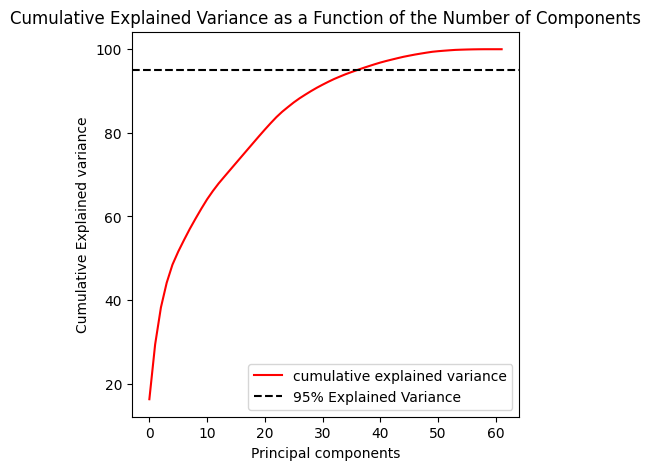

In [19]:
scaler.fit(vocalsound_gemaps_train)
vocalsound_gemaps_train_scaler = scaler.transform(vocalsound_gemaps_train)
vocalsound_gemaps_train_val_scaler = scaler.transform(vocalsound_gemaps_train_val)
vocalsound_gemaps_test_scaler = scaler.transform(vocalsound_gemaps_test)

plot_relation_between_VAR_and_DIM(vocalsound_gemaps_train_scaler)

In [23]:
pca = PCA(.95) 
pca.fit(vocalsound_gemaps_train_scaler)
pca.fit(vocalsound_gemaps_train_val_scaler)

vocalsound_gemaps_train_pca = pca.transform(vocalsound_gemaps_train_scaler)
vocalsound_gemaps_train_val_pca = pca.transform(vocalsound_gemaps_train_val_scaler)
vocalsound_gemaps_test_pca = pca.transform(vocalsound_gemaps_test_scaler)

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.588    |0.566    |0.611    |
|laugh/смех          |0.715    |0.648    |0.798    |
|sigh/вздох          |0.768    |0.763    |0.773    |
|sneeze/чихание      |0.608    |0.558    |0.668    |
|sniff/вдыхание носом|0.731    |0.688    |0.780    |
|throatcl./проч.горла|0.521    |0.666    |0.427    |
----------------------------------------------------
Weighted average Precision : 0.676                 |
----------------------------------------------------
Weighted average Recall : 0.648                    |
----------------------------------------------------
Weighted average F1 : 0.655                        |
----------------------------------------------------
Accuracy : 0.648                                   |
----------------------------------------------------

Confusion matrix:
[[339  37   6  58

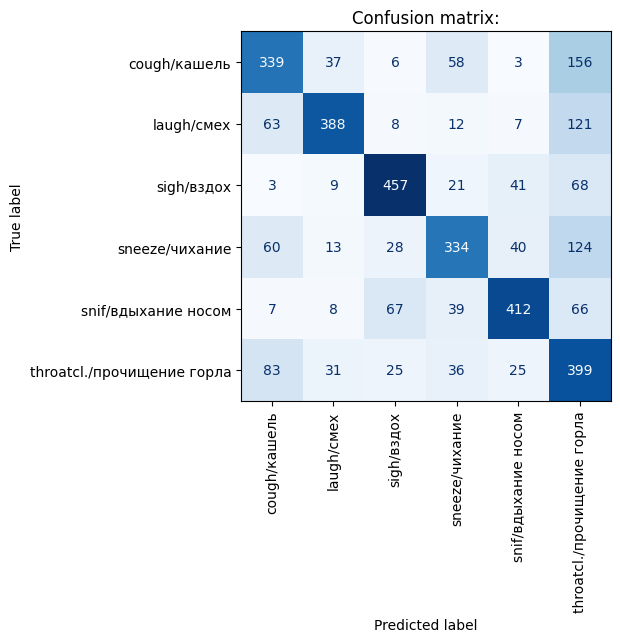

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.659    |0.661    |0.657    |
|laugh/смех          |0.782    |0.786    |0.779    |
|sigh/вздох          |0.792    |0.793    |0.792    |
|sneeze/чихание      |0.679    |0.658    |0.701    |
|sniff/вдыхание носом|0.758    |0.823    |0.703    |
|throatcl./проч.горла|0.610    |0.571    |0.654    |
----------------------------------------------------
Weighted average Precision : 0.714                 |
----------------------------------------------------
Weighted average Recall : 0.715                    |
----------------------------------------------------
Weighted average F1 : 0.713                        |
----------------------------------------------------
Accuracy : 0.715                                   |
----------------------------------------------------

Confusion matrix:
[[396  57   8  60 

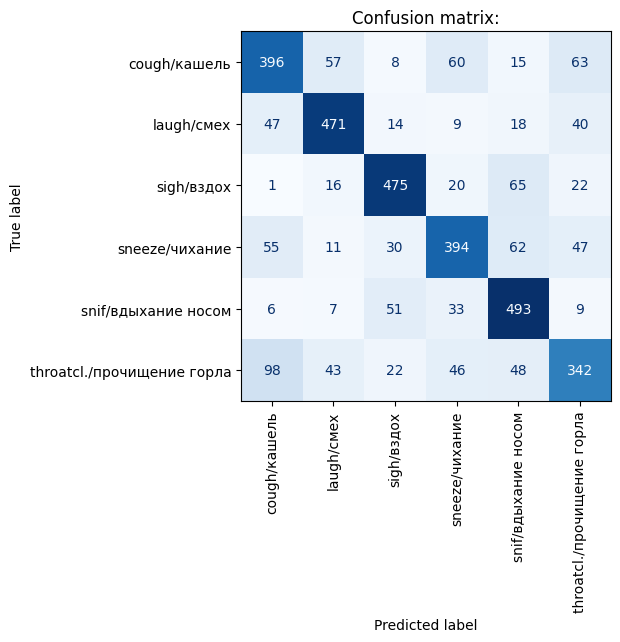

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.467    |0.501    |0.437    |
|laugh/смех          |0.550    |0.504    |0.604    |
|sigh/вздох          |0.532    |0.589    |0.484    |
|sneeze/чихание      |0.415    |0.412    |0.419    |
|sniff/вдыхание носом|0.502    |0.549    |0.461    |
|throatcl./проч.горла|0.287    |0.234    |0.373    |
----------------------------------------------------
Weighted average Precision : 0.463                 |
----------------------------------------------------
Weighted average Recall : 0.465                    |
----------------------------------------------------
Weighted average F1 : 0.459                        |
----------------------------------------------------
Accuracy : 0.465                                   |
----------------------------------------------------

Confusion matrix:
[[300  56  12 

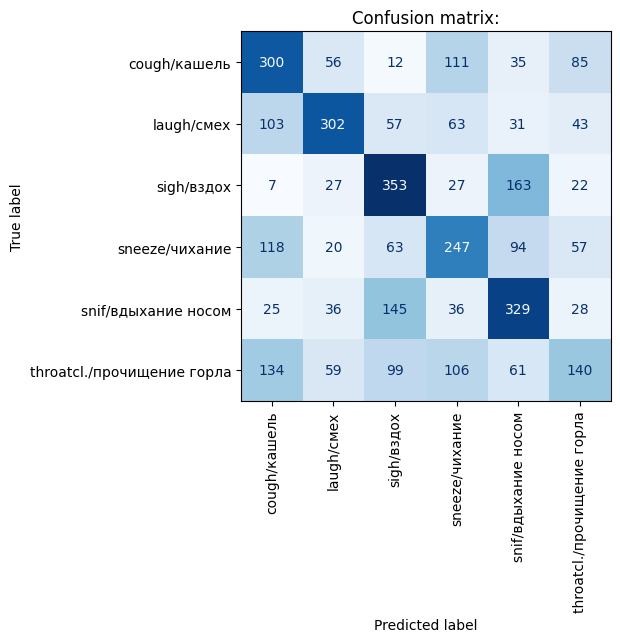

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.614    |0.644    |0.587    |
|laugh/смех          |0.717    |0.701    |0.734    |
|sigh/вздох          |0.712    |0.721    |0.702    |
|sneeze/чихание      |0.580    |0.581    |0.579    |
|sniff/вдыхание носом|0.705    |0.743    |0.670    |
|throatcl./проч.горла|0.467    |0.422    |0.523    |
----------------------------------------------------
Weighted average Precision : 0.633                 |
----------------------------------------------------
Weighted average Recall : 0.636                    |
----------------------------------------------------
Weighted average F1 : 0.633                        |
----------------------------------------------------
Accuracy : 0.636                                   |
----------------------------------------------------

Confusion matrix:
[[386  60  11  74   9 

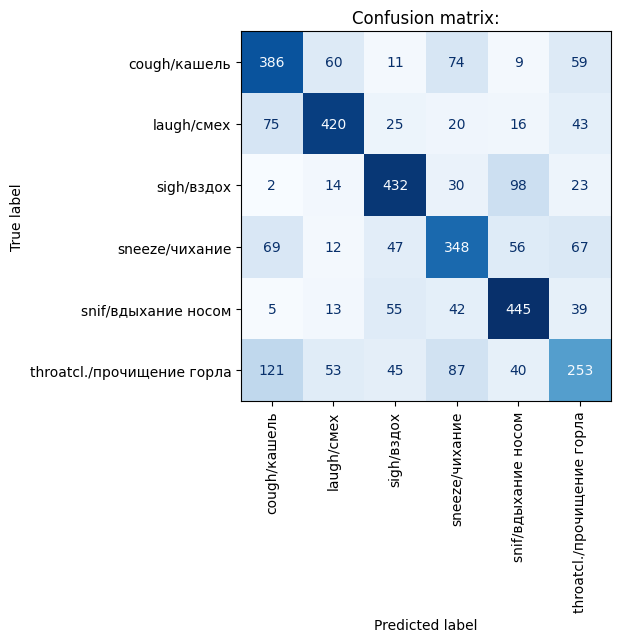

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.510    |0.639    |0.425    |
|laugh/смех          |0.616    |0.619    |0.612    |
|sigh/вздох          |0.707    |0.726    |0.689    |
|sneeze/чихание      |0.496    |0.432    |0.581    |
|sniff/вдыхание носом|0.687    |0.648    |0.731    |
|throatcl./проч.горла|0.427    |0.384    |0.481    |
----------------------------------------------------
Weighted average Precision : 0.586                 |
----------------------------------------------------
Weighted average Recall : 0.575                    |
----------------------------------------------------
Weighted average F1 : 0.574                        |
----------------------------------------------------
Accuracy : 0.575                                   |
----------------------------------------------------

Confusion matrix:
[[383  77  14  50   6 

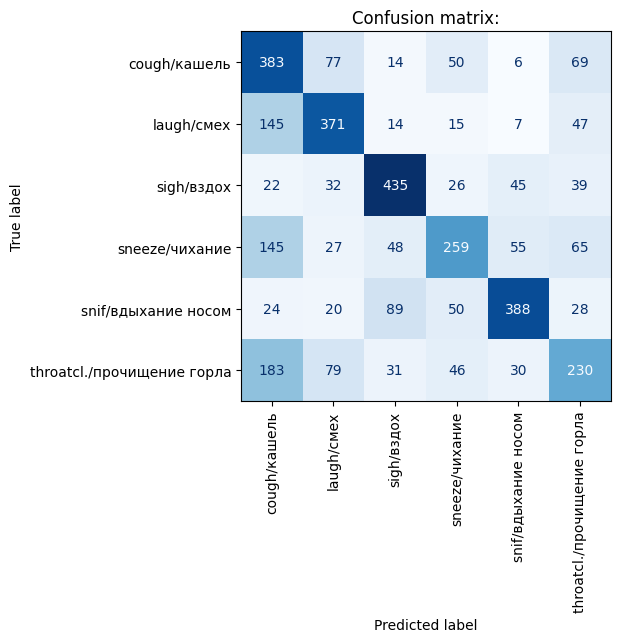

Logistic Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.616    |0.628    |0.605    |
|laugh/смех          |0.729    |0.735    |0.724    |
|sigh/вздох          |0.765    |0.776    |0.754    |
|sneeze/чихание      |0.633    |0.636    |0.630    |
|sniff/вдыхание носом|0.699    |0.725    |0.675    |
|throatcl./проч.горла|0.480    |0.441    |0.528    |
----------------------------------------------------
Weighted average Precision : 0.653                 |
----------------------------------------------------
Weighted average Recall : 0.657                    |
----------------------------------------------------
Weighted average F1 : 0.654                        |
----------------------------------------------------
Accuracy : 0.657                                   |
----------------------------------------------------

Confusion matrix:
[[376 

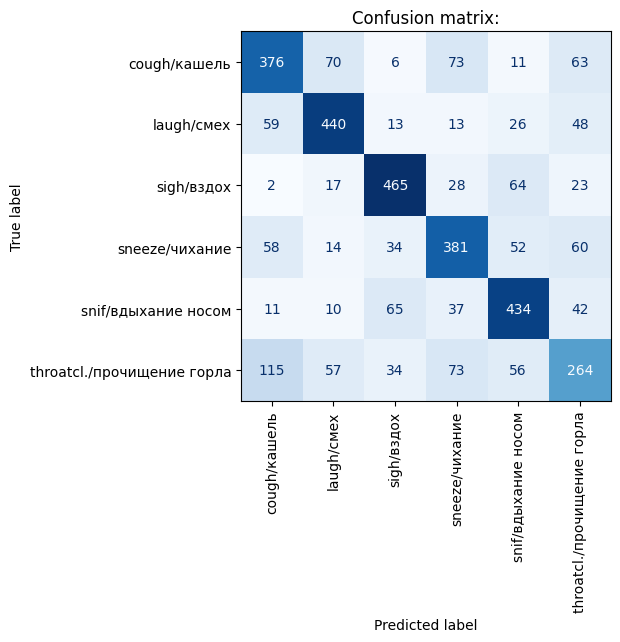

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.416    |0.434    |0.400    |
|laugh/смех          |0.501    |0.482    |0.522    |
|sigh/вздох          |0.566    |0.568    |0.564    |
|sneeze/чихание      |0.351    |0.347    |0.356    |
|sniff/вдыхание носом|0.552    |0.561    |0.543    |
|throatcl./проч.горла|0.347    |0.342    |0.352    |
----------------------------------------------------
Weighted average Precision : 0.456                 |
----------------------------------------------------
Weighted average Recall : 0.456                    |
----------------------------------------------------
Weighted average F1 : 0.456                        |
----------------------------------------------------
Accuracy : 0.456                                   |
----------------------------------------------------

Confusion matrix:
[[260  94  2

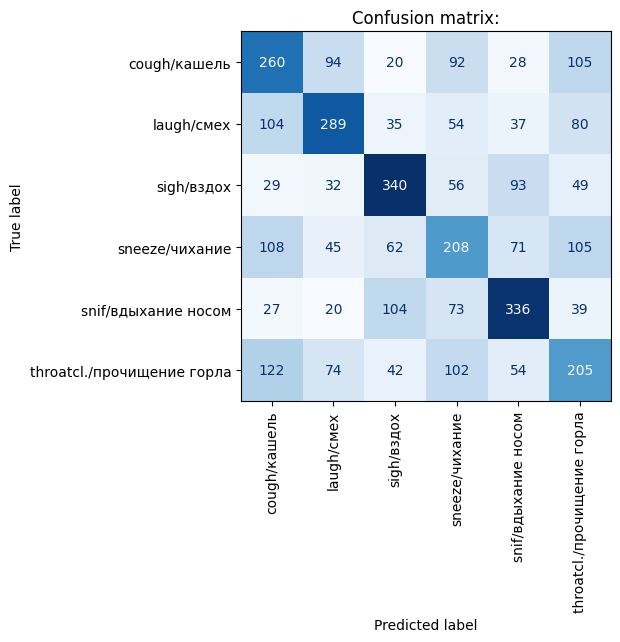

Neural Network:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.605    |0.629    |0.583    |
|laugh/смех          |0.755    |0.781    |0.730    |
|sigh/вздох          |0.760    |0.776    |0.745    |
|sneeze/чихание      |0.638    |0.614    |0.664    |
|sniff/вдыхание носом|0.718    |0.741    |0.696    |
|throatcl./проч.горла|0.544    |0.494    |0.604    |
----------------------------------------------------
Weighted average Precision : 0.670                 |
----------------------------------------------------
Weighted average Recall : 0.673                    |
----------------------------------------------------
Weighted average F1 : 0.670                        |
----------------------------------------------------
Accuracy : 0.673                                   |
----------------------------------------------------

Confusion matrix:
[[377  74  

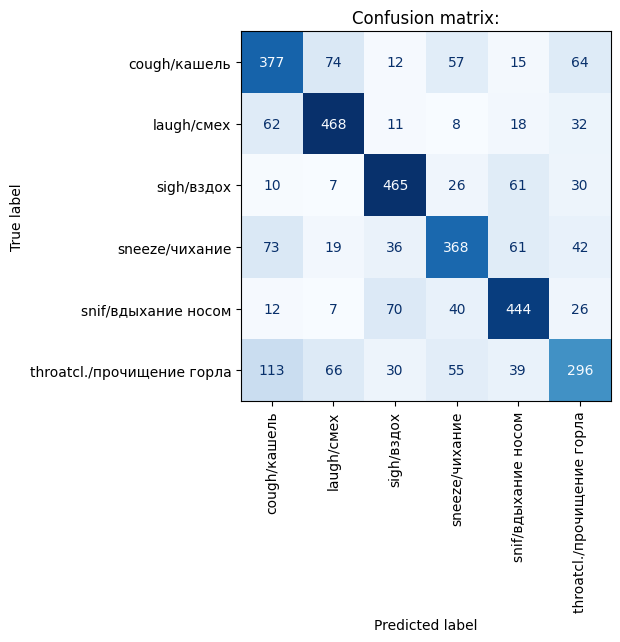

In [24]:
comparing_with_sota_VS(models, names, vocalsound_gemaps_train_pca, vocalsound_targets_train_gemaps, vocalsound_gemaps_test_pca, vocalsound_targets_test_gemaps)

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.578    |0.554    |0.604    |
|laugh/смех          |0.722    |0.658    |0.799    |
|sigh/вздох          |0.777    |0.770    |0.785    |
|sneeze/чихание      |0.609    |0.564    |0.661    |
|sniff/вдыхание носом|0.736    |0.691    |0.787    |
|throatcl./проч.горла|0.526    |0.669    |0.433    |
----------------------------------------------------
Weighted average Precision : 0.678                 |
----------------------------------------------------
Weighted average Recall : 0.651                    |
----------------------------------------------------
Weighted average F1 : 0.658                        |
----------------------------------------------------
Accuracy : 0.651                                   |
----------------------------------------------------

Confusion matrix:
[[332  42   6  65

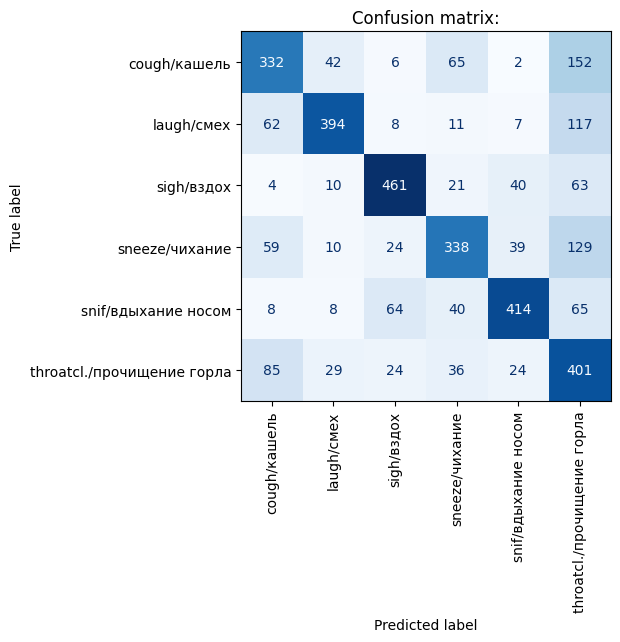

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.649    |0.646    |0.652    |
|laugh/смех          |0.777    |0.783    |0.771    |
|sigh/вздох          |0.797    |0.796    |0.798    |
|sneeze/чихание      |0.671    |0.659    |0.683    |
|sniff/вдыхание носом|0.764    |0.826    |0.711    |
|throatcl./проч.горла|0.613    |0.573    |0.660    |
----------------------------------------------------
Weighted average Precision : 0.712                 |
----------------------------------------------------
Weighted average Recall : 0.714                    |
----------------------------------------------------
Weighted average F1 : 0.712                        |
----------------------------------------------------
Accuracy : 0.714                                   |
----------------------------------------------------

Confusion matrix:
[[387  59   8  68 

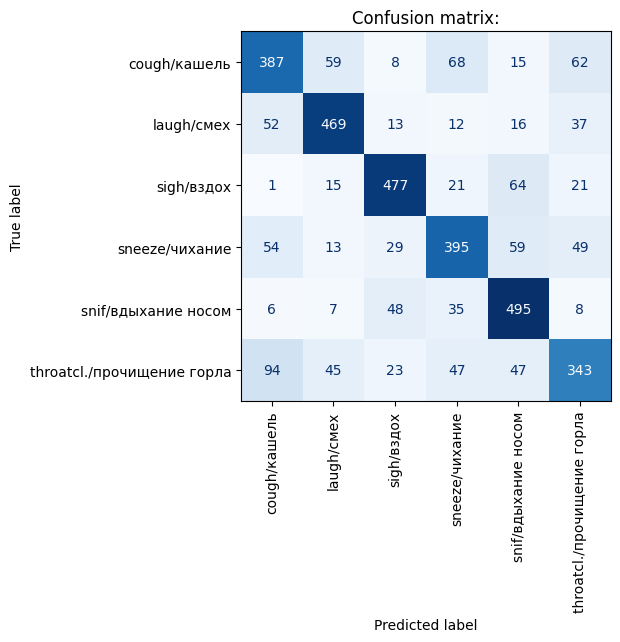

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.451    |0.476    |0.429    |
|laugh/смех          |0.564    |0.564    |0.564    |
|sigh/вздох          |0.540    |0.586    |0.501    |
|sneeze/чихание      |0.464    |0.424    |0.512    |
|sniff/вдыхание носом|0.512    |0.534    |0.492    |
|throatcl./проч.горла|0.298    |0.269    |0.333    |
----------------------------------------------------
Weighted average Precision : 0.472                 |
----------------------------------------------------
Weighted average Recall : 0.476                    |
----------------------------------------------------
Weighted average F1 : 0.472                        |
----------------------------------------------------
Accuracy : 0.476                                   |
----------------------------------------------------

Confusion matrix:
[[285  99  11 

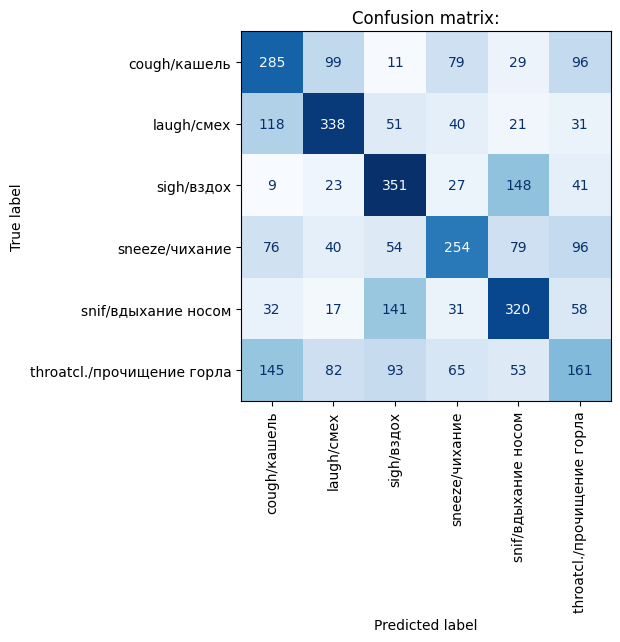

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.605    |0.631    |0.582    |
|laugh/смех          |0.712    |0.699    |0.725    |
|sigh/вздох          |0.713    |0.720    |0.707    |
|sneeze/чихание      |0.573    |0.574    |0.571    |
|sniff/вдыхание носом|0.707    |0.753    |0.667    |
|throatcl./проч.горла|0.466    |0.419    |0.525    |
----------------------------------------------------
Weighted average Precision : 0.629                 |
----------------------------------------------------
Weighted average Recall : 0.633                    |
----------------------------------------------------
Weighted average F1 : 0.629                        |
----------------------------------------------------
Accuracy : 0.633                                   |
----------------------------------------------------

Confusion matrix:
[[378  65  10  75  10 

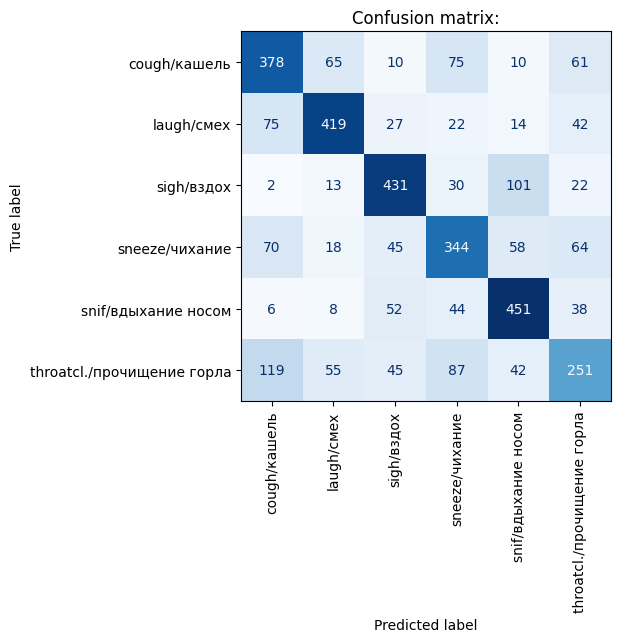

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.525    |0.643    |0.443    |
|laugh/смех          |0.638    |0.649    |0.626    |
|sigh/вздох          |0.708    |0.730    |0.688    |
|sneeze/чихание      |0.501    |0.439    |0.583    |
|sniff/вдыхание носом|0.693    |0.663    |0.727    |
|throatcl./проч.горла|0.435    |0.389    |0.494    |
----------------------------------------------------
Weighted average Precision : 0.594                 |
----------------------------------------------------
Weighted average Recall : 0.585                    |
----------------------------------------------------
Weighted average F1 : 0.583                        |
----------------------------------------------------
Accuracy : 0.585                                   |
----------------------------------------------------

Confusion matrix:
[[385  71  17  54   5 

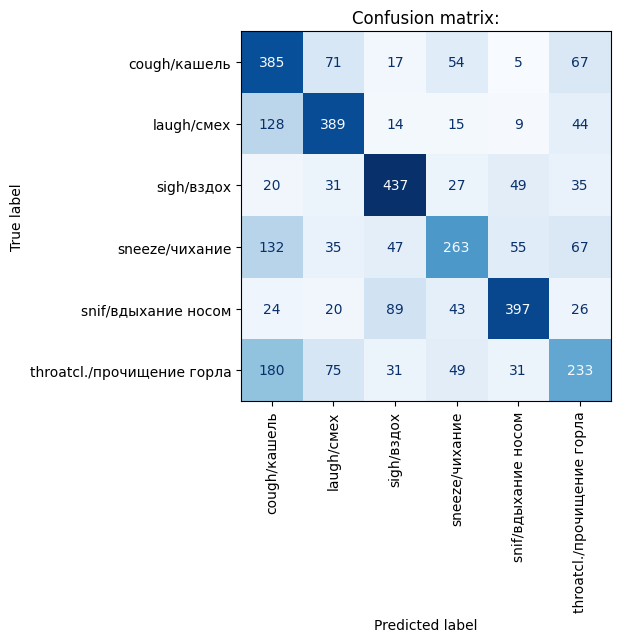

Logistic Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.610    |0.621    |0.600    |
|laugh/смех          |0.720    |0.726    |0.713    |
|sigh/вздох          |0.763    |0.775    |0.752    |
|sneeze/чихание      |0.631    |0.629    |0.633    |
|sniff/вдыхание носом|0.700    |0.728    |0.674    |
|throatcl./проч.горла|0.471    |0.434    |0.516    |
----------------------------------------------------
Weighted average Precision : 0.648                 |
----------------------------------------------------
Weighted average Recall : 0.652                    |
----------------------------------------------------
Weighted average F1 : 0.649                        |
----------------------------------------------------
Accuracy : 0.652                                   |
----------------------------------------------------

Confusion matrix:
[[372 

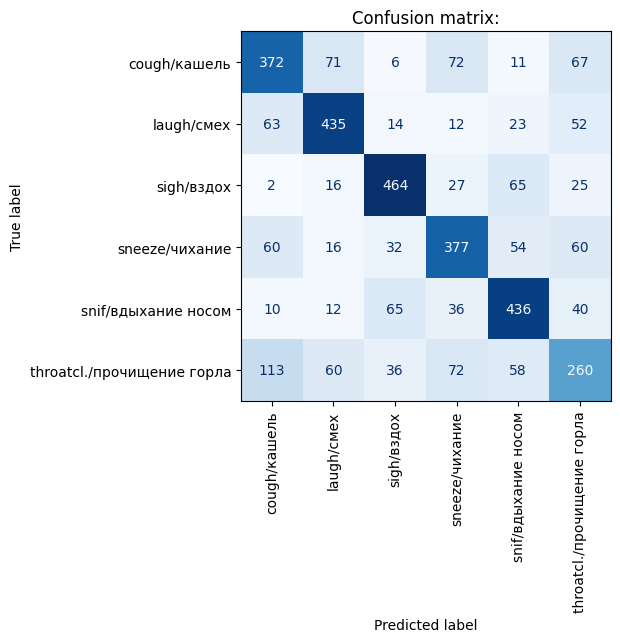

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.366    |0.376    |0.357    |
|laugh/смех          |0.470    |0.456    |0.486    |
|sigh/вздох          |0.562    |0.553    |0.572    |
|sneeze/чихание      |0.347    |0.336    |0.358    |
|sniff/вдыхание носом|0.535    |0.559    |0.513    |
|throatcl./проч.горла|0.326    |0.329    |0.323    |
----------------------------------------------------
Weighted average Precision : 0.435                 |
----------------------------------------------------
Weighted average Recall : 0.435                    |
----------------------------------------------------
Weighted average F1 : 0.434                        |
----------------------------------------------------
Accuracy : 0.435                                   |
----------------------------------------------------

Confusion matrix:
[[225  92  2

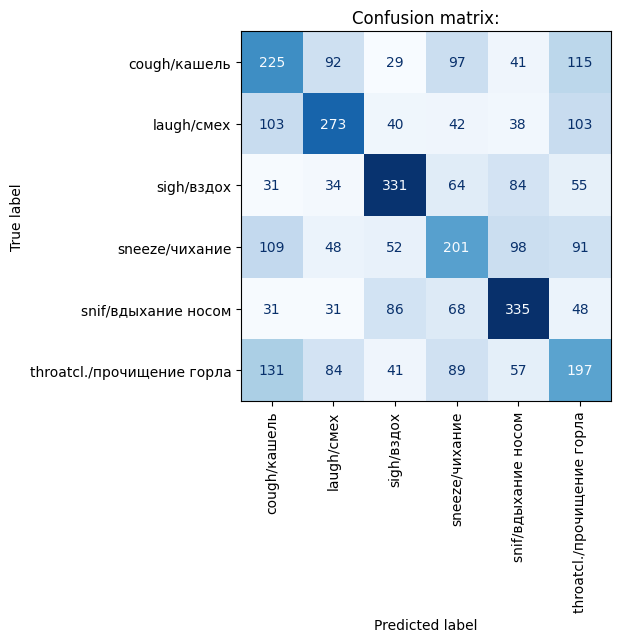

Neural Network:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.617    |0.656    |0.582    |
|laugh/смех          |0.745    |0.750    |0.741    |
|sigh/вздох          |0.761    |0.756    |0.766    |
|sneeze/чихание      |0.637    |0.624    |0.650    |
|sniff/вдыхание носом|0.722    |0.716    |0.727    |
|throatcl./проч.горла|0.564    |0.544    |0.585    |
----------------------------------------------------
Weighted average Precision : 0.675                 |
----------------------------------------------------
Weighted average Recall : 0.674                    |
----------------------------------------------------
Weighted average F1 : 0.674                        |
----------------------------------------------------
Accuracy : 0.674                                   |
----------------------------------------------------

Confusion matrix:
[[393  60  

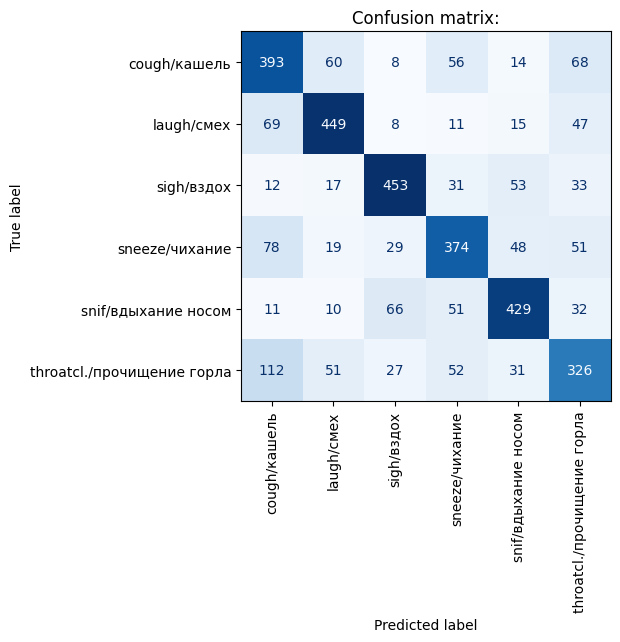

In [26]:
comparing_with_sota_VS(models, names, vocalsound_gemaps_train_val_pca, vocalsound_targets_train_val_gemaps, vocalsound_gemaps_test_pca, vocalsound_targets_test_gemaps)

## eGEMAPS FEATURES TEST 

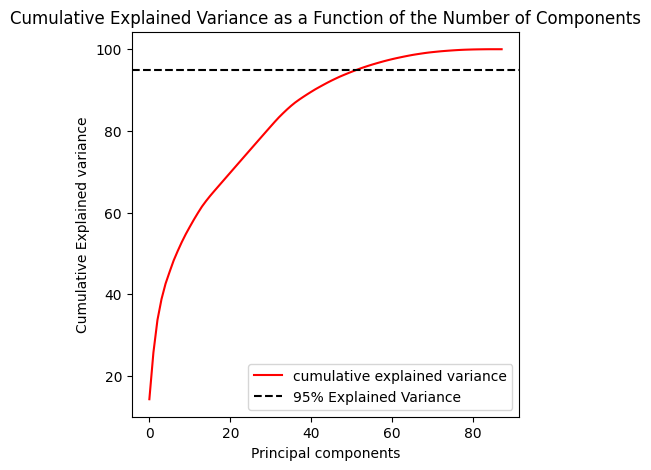

In [31]:
scaler.fit(vocalsound_egemaps_train)
vocalsound_egemaps_train_scaler = scaler.transform(vocalsound_egemaps_train)
vocalsound_egemaps_train_val_scaler = scaler.transform(vocalsound_egemaps_train_val)
vocalsound_egemaps_test_scaler = scaler.transform(vocalsound_egemaps_test)

plot_relation_between_VAR_and_DIM(vocalsound_egemaps_train_scaler)

In [32]:
pca = PCA(.95) 
pca.fit(vocalsound_egemaps_train_scaler)
pca.fit(vocalsound_egemaps_train_val_scaler)

vocalsound_egemaps_train_pca = pca.transform(vocalsound_egemaps_train_scaler)
vocalsound_egemaps_train_val_pca = pca.transform(vocalsound_egemaps_train_val_scaler)
vocalsound_egemaps_test_pca = pca.transform(vocalsound_egemaps_test_scaler)

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.644    |0.723    |0.580    |
|laugh/смех          |0.741    |0.701    |0.785    |
|sigh/вздох          |0.795    |0.795    |0.795    |
|sneeze/чихание      |0.664    |0.633    |0.699    |
|sniff/вдыхание носом|0.788    |0.761    |0.817    |
|throatcl./проч.горла|0.640    |0.648    |0.632    |
----------------------------------------------------
Weighted average Precision : 0.718                 |
----------------------------------------------------
Weighted average Recall : 0.710                    |
----------------------------------------------------
Weighted average F1 : 0.712                        |
----------------------------------------------------
Accuracy : 0.710                                   |
----------------------------------------------------

Confusion matrix:
[[433  38  13  56

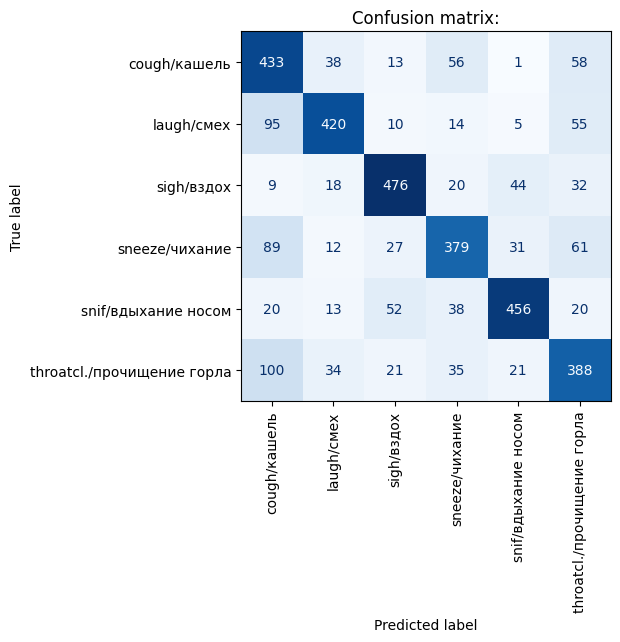

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.685    |0.696    |0.674    |
|laugh/смех          |0.801    |0.801    |0.800    |
|sigh/вздох          |0.804    |0.805    |0.803    |
|sneeze/чихание      |0.708    |0.698    |0.718    |
|sniff/вдыхание носом|0.793    |0.850    |0.743    |
|throatcl./проч.горла|0.681    |0.629    |0.742    |
----------------------------------------------------
Weighted average Precision : 0.747                 |
----------------------------------------------------
Weighted average Recall : 0.747                    |
----------------------------------------------------
Weighted average F1 : 0.745                        |
----------------------------------------------------
Accuracy : 0.747                                   |
----------------------------------------------------

Confusion matrix:
[[417  53  12  61 

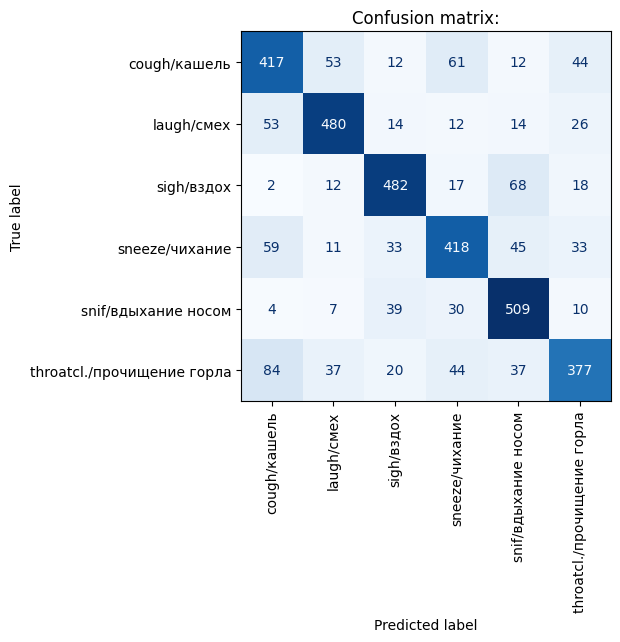

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.522    |0.492    |0.556    |
|laugh/смех          |0.534    |0.628    |0.464    |
|sigh/вздох          |0.646    |0.641    |0.651    |
|sneeze/чихание      |0.444    |0.508    |0.395    |
|sniff/вдыхание носом|0.592    |0.574    |0.610    |
|throatcl./проч.горла|0.467    |0.362    |0.658    |
----------------------------------------------------
Weighted average Precision : 0.556                 |
----------------------------------------------------
Weighted average Recall : 0.534                    |
----------------------------------------------------
Weighted average F1 : 0.534                        |
----------------------------------------------------
Accuracy : 0.534                                   |
----------------------------------------------------

Confusion matrix:
[[295 123  11 

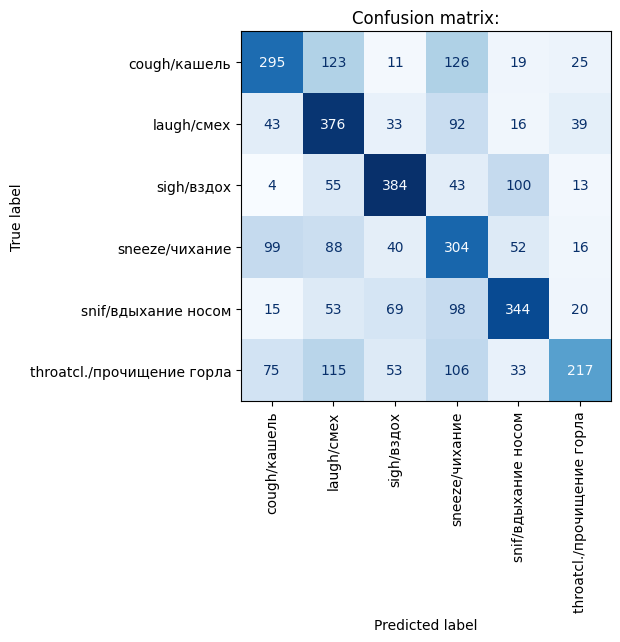

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.640    |0.661    |0.621    |
|laugh/смех          |0.741    |0.706    |0.780    |
|sigh/вздох          |0.756    |0.766    |0.745    |
|sneeze/чихание      |0.640    |0.668    |0.614    |
|sniff/вдыхание носом|0.749    |0.746    |0.751    |
|throatcl./проч.горла|0.622    |0.598    |0.649    |
----------------------------------------------------
Weighted average Precision : 0.693                 |
----------------------------------------------------
Weighted average Recall : 0.691                    |
----------------------------------------------------
Weighted average F1 : 0.691                        |
----------------------------------------------------
Accuracy : 0.691                                   |
----------------------------------------------------

Confusion matrix:
[[396  53  13  82   7 

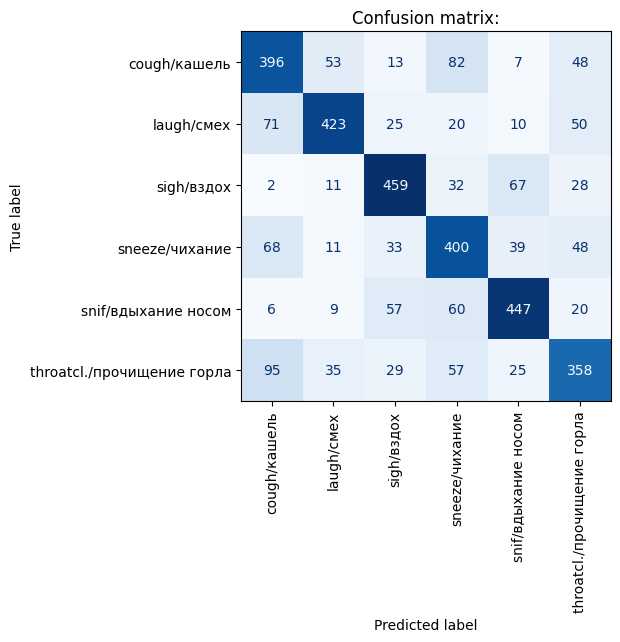

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.552    |0.683    |0.463    |
|laugh/смех          |0.639    |0.648    |0.631    |
|sigh/вздох          |0.706    |0.694    |0.718    |
|sneeze/чихание      |0.551    |0.503    |0.609    |
|sniff/вдыхание носом|0.731    |0.705    |0.760    |
|throatcl./проч.горла|0.555    |0.494    |0.632    |
----------------------------------------------------
Weighted average Precision : 0.636                 |
----------------------------------------------------
Weighted average Recall : 0.621                    |
----------------------------------------------------
Weighted average F1 : 0.622                        |
----------------------------------------------------
Accuracy : 0.621                                   |
----------------------------------------------------

Confusion matrix:
[[409  62  13  61   5 

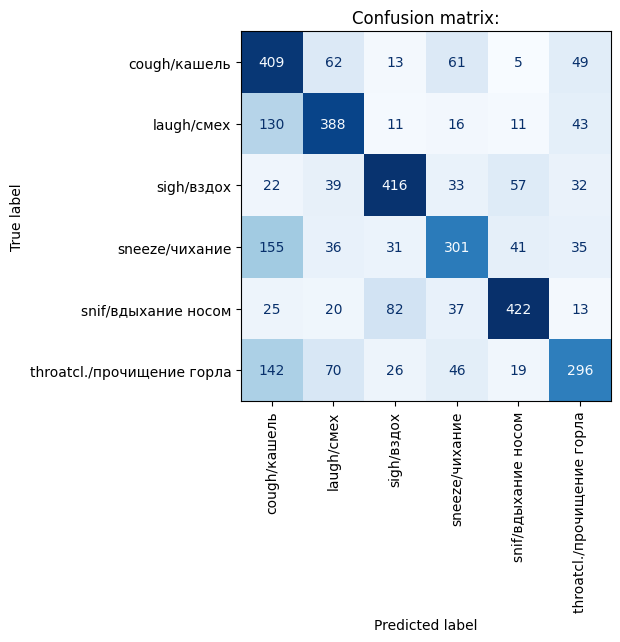

Logistic Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.651    |0.659    |0.642    |
|laugh/смех          |0.756    |0.751    |0.761    |
|sigh/вздох          |0.786    |0.798    |0.773    |
|sneeze/чихание      |0.663    |0.681    |0.646    |
|sniff/вдыхание носом|0.783    |0.806    |0.761    |
|throatcl./проч.горла|0.630    |0.579    |0.690    |
----------------------------------------------------
Weighted average Precision : 0.712                 |
----------------------------------------------------
Weighted average Recall : 0.713                    |
----------------------------------------------------
Weighted average F1 : 0.711                        |
----------------------------------------------------
Accuracy : 0.713                                   |
----------------------------------------------------

Confusion matrix:
[[395 

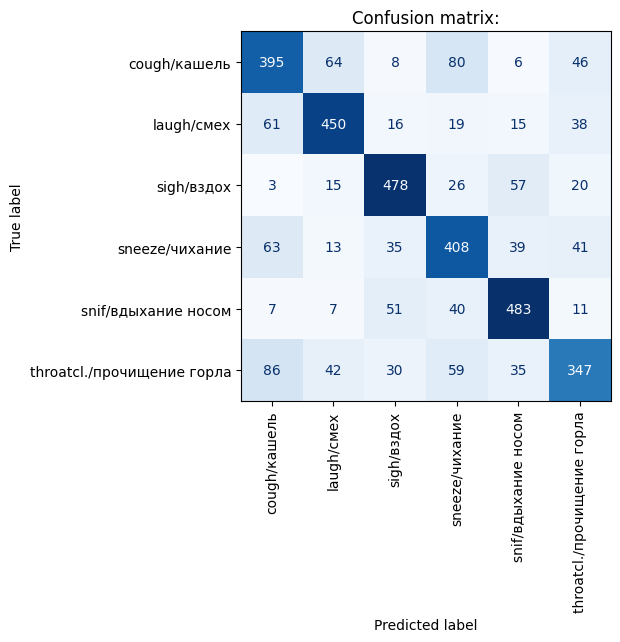

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.416    |0.414    |0.419    |
|laugh/смех          |0.476    |0.482    |0.470    |
|sigh/вздох          |0.552    |0.536    |0.568    |
|sneeze/чихание      |0.396    |0.392    |0.400    |
|sniff/вдыхание носом|0.583    |0.594    |0.572    |
|throatcl./проч.горла|0.378    |0.382    |0.374    |
----------------------------------------------------
Weighted average Precision : 0.467                 |
----------------------------------------------------
Weighted average Recall : 0.467                    |
----------------------------------------------------
Weighted average F1 : 0.467                        |
----------------------------------------------------
Accuracy : 0.467                                   |
----------------------------------------------------

Confusion matrix:
[[248  97  2

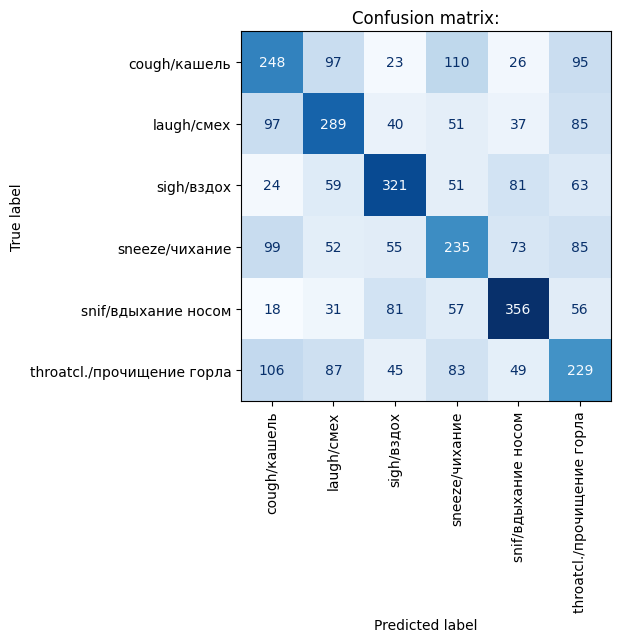

Neural Network:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.615    |0.621    |0.609    |
|laugh/смех          |0.768    |0.783    |0.753    |
|sigh/вздох          |0.776    |0.771    |0.780    |
|sneeze/чихание      |0.657    |0.656    |0.658    |
|sniff/вдыхание носом|0.757    |0.758    |0.757    |
|throatcl./проч.горла|0.629    |0.614    |0.644    |
----------------------------------------------------
Weighted average Precision : 0.700                 |
----------------------------------------------------
Weighted average Recall : 0.701                    |
----------------------------------------------------
Weighted average F1 : 0.700                        |
----------------------------------------------------
Accuracy : 0.701                                   |
----------------------------------------------------

Confusion matrix:
[[372  68  

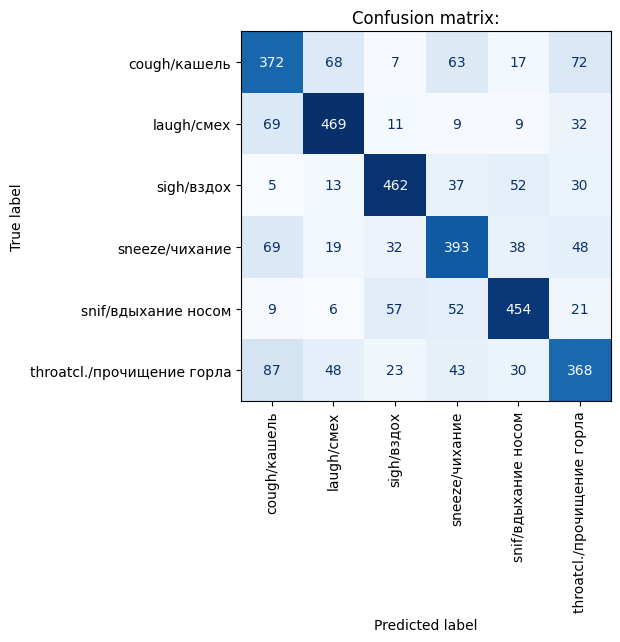

In [34]:
comparing_with_sota_VS(models, names, vocalsound_egemaps_train_pca, vocalsound_targets_train_egemaps, vocalsound_egemaps_test_pca, vocalsound_targets_test_egemaps)

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.646    |0.725    |0.583    |
|laugh/смех          |0.740    |0.693    |0.793    |
|sigh/вздох          |0.792    |0.791    |0.793    |
|sneeze/чихание      |0.647    |0.618    |0.679    |
|sniff/вдыхание носом|0.779    |0.746    |0.814    |
|throatcl./проч.горла|0.639    |0.658    |0.621    |
----------------------------------------------------
Weighted average Precision : 0.714                 |
----------------------------------------------------
Weighted average Recall : 0.705                    |
----------------------------------------------------
Weighted average F1 : 0.707                        |
----------------------------------------------------
Accuracy : 0.705                                   |
----------------------------------------------------

Confusion matrix:
[[434  33  13  62

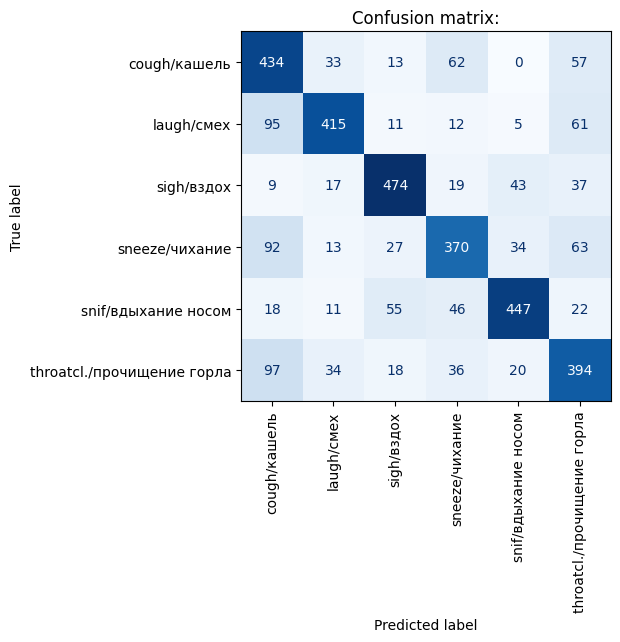

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.689    |0.696    |0.682    |
|laugh/смех          |0.802    |0.806    |0.798    |
|sigh/вздох          |0.810    |0.810    |0.810    |
|sneeze/чихание      |0.710    |0.703    |0.717    |
|sniff/вдыхание носом|0.795    |0.853    |0.745    |
|throatcl./проч.горла|0.686    |0.633    |0.749    |
----------------------------------------------------
Weighted average Precision : 0.750                 |
----------------------------------------------------
Weighted average Recall : 0.750                    |
----------------------------------------------------
Weighted average F1 : 0.749                        |
----------------------------------------------------
Accuracy : 0.750                                   |
----------------------------------------------------

Confusion matrix:
[[417  56   9  60 

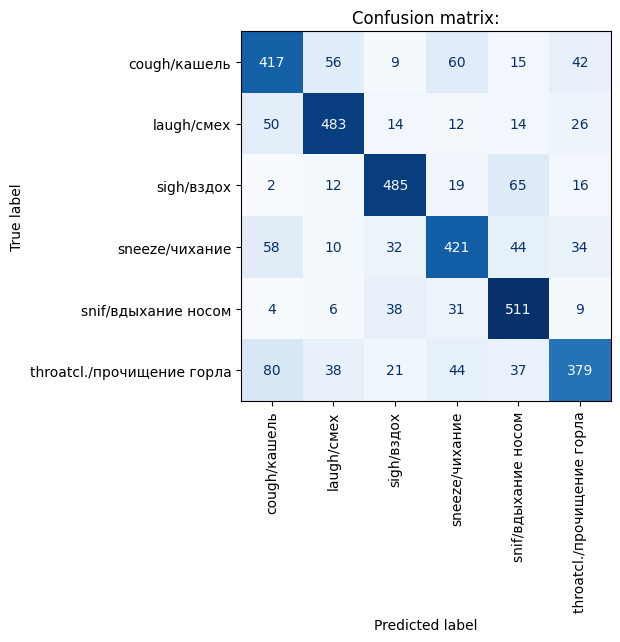

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.546    |0.556    |0.536    |
|laugh/смех          |0.579    |0.636    |0.531    |
|sigh/вздох          |0.656    |0.664    |0.647    |
|sneeze/чихание      |0.479    |0.536    |0.433    |
|sniff/вдыхание носом|0.572    |0.549    |0.596    |
|throatcl./проч.горла|0.489    |0.386    |0.668    |
----------------------------------------------------
Weighted average Precision : 0.568                 |
----------------------------------------------------
Weighted average Recall : 0.555                    |
----------------------------------------------------
Weighted average F1 : 0.553                        |
----------------------------------------------------
Accuracy : 0.555                                   |
----------------------------------------------------

Confusion matrix:
[[333  89  11 

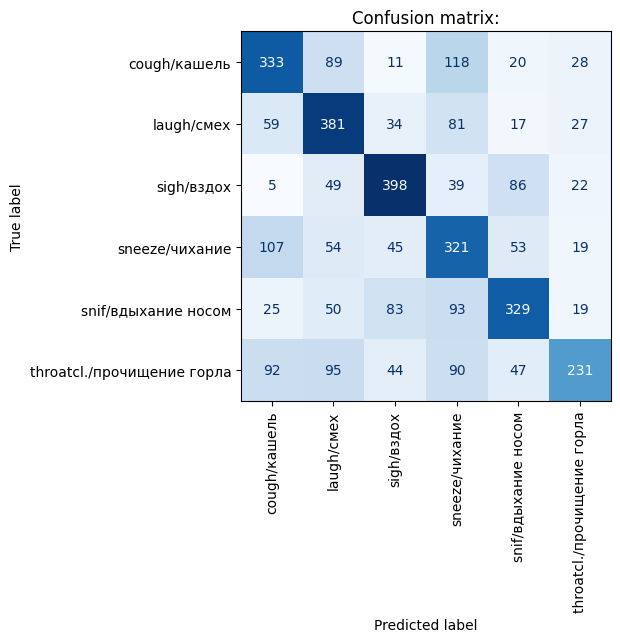

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.644    |0.661    |0.628    |
|laugh/смех          |0.720    |0.686    |0.758    |
|sigh/вздох          |0.748    |0.765    |0.733    |
|sneeze/чихание      |0.639    |0.668    |0.613    |
|sniff/вдыхание носом|0.747    |0.743    |0.752    |
|throatcl./проч.горла|0.620    |0.596    |0.647    |
----------------------------------------------------
Weighted average Precision : 0.688                 |
----------------------------------------------------
Weighted average Recall : 0.686                    |
----------------------------------------------------
Weighted average F1 : 0.687                        |
----------------------------------------------------
Accuracy : 0.686                                   |
----------------------------------------------------

Confusion matrix:
[[396  53  15  82   5 

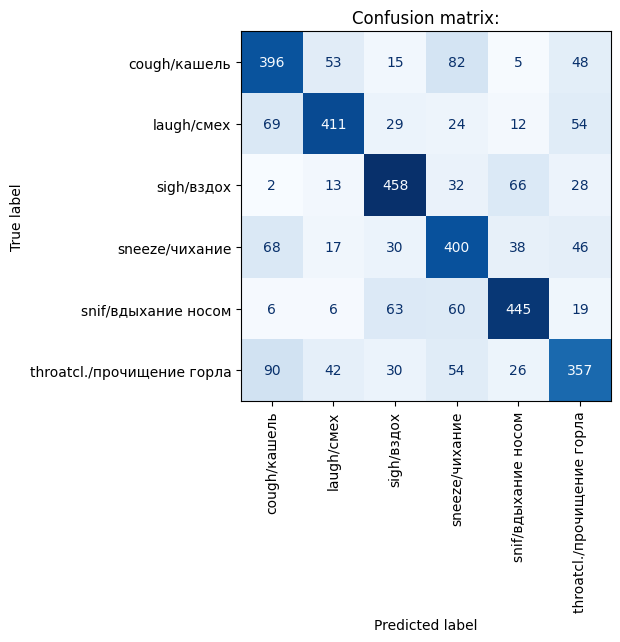

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.552    |0.676    |0.466    |
|laugh/смех          |0.633    |0.646    |0.621    |
|sigh/вздох          |0.714    |0.706    |0.722    |
|sneeze/чихание      |0.548    |0.508    |0.595    |
|sniff/вдыхание носом|0.737    |0.703    |0.775    |
|throatcl./проч.горла|0.554    |0.491    |0.636    |
----------------------------------------------------
Weighted average Precision : 0.636                 |
----------------------------------------------------
Weighted average Recall : 0.622                    |
----------------------------------------------------
Weighted average F1 : 0.623                        |
----------------------------------------------------
Accuracy : 0.622                                   |
----------------------------------------------------

Confusion matrix:
[[405  64  14  62   6 

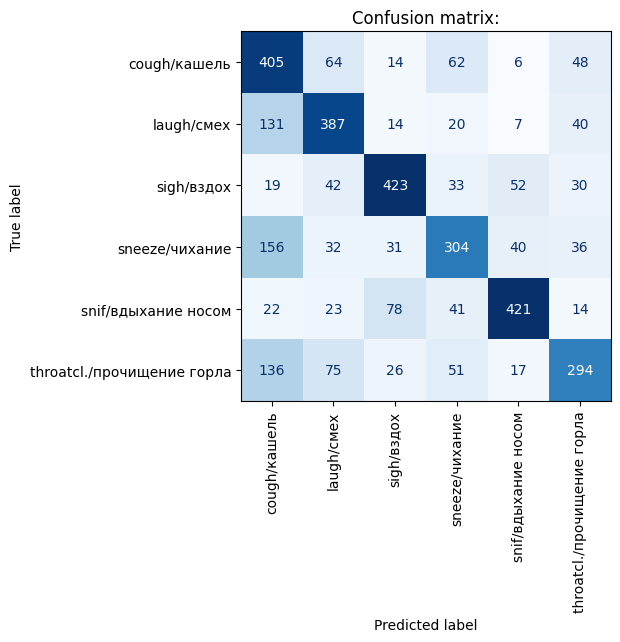

Logistic Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.649    |0.653    |0.645    |
|laugh/смех          |0.740    |0.733    |0.748    |
|sigh/вздох          |0.776    |0.791    |0.761    |
|sneeze/чихание      |0.667    |0.686    |0.648    |
|sniff/вдыхание носом|0.775    |0.793    |0.758    |
|throatcl./проч.горла|0.633    |0.589    |0.683    |
----------------------------------------------------
Weighted average Precision : 0.707                 |
----------------------------------------------------
Weighted average Recall : 0.708                    |
----------------------------------------------------
Weighted average F1 : 0.707                        |
----------------------------------------------------
Accuracy : 0.708                                   |
----------------------------------------------------

Confusion matrix:
[[391 

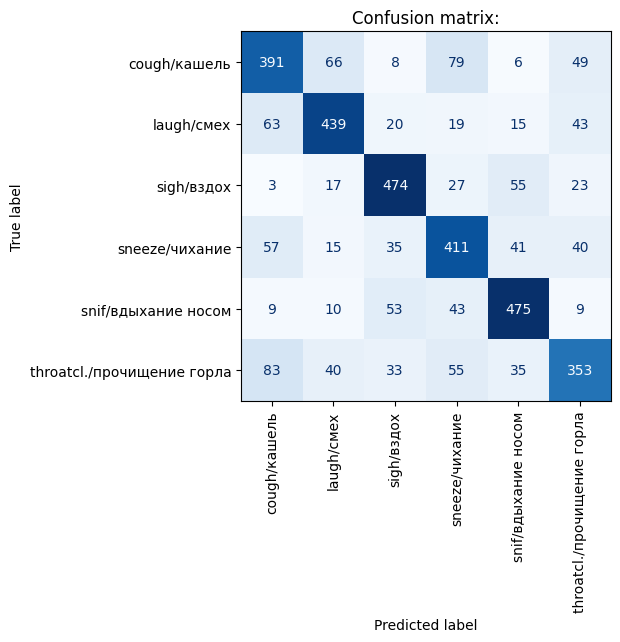

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.378    |0.384    |0.372    |
|laugh/смех          |0.448    |0.439    |0.457    |
|sigh/вздох          |0.563    |0.569    |0.557    |
|sneeze/чихание      |0.393    |0.402    |0.383    |
|sniff/вдыхание носом|0.577    |0.569    |0.584    |
|throatcl./проч.горла|0.376    |0.369    |0.384    |
----------------------------------------------------
Weighted average Precision : 0.456                 |
----------------------------------------------------
Weighted average Recall : 0.455                    |
----------------------------------------------------
Weighted average F1 : 0.456                        |
----------------------------------------------------
Accuracy : 0.455                                   |
----------------------------------------------------

Confusion matrix:
[[230 104  3

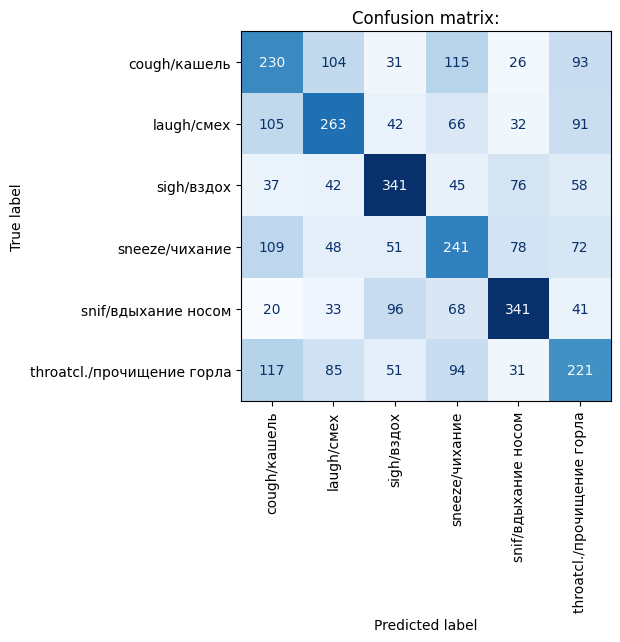

Neural Network:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.626    |0.629    |0.623    |
|laugh/смех          |0.766    |0.776    |0.756    |
|sigh/вздох          |0.780    |0.771    |0.790    |
|sneeze/чихание      |0.640    |0.646    |0.633    |
|sniff/вдыхание носом|0.766    |0.756    |0.777    |
|throatcl./проч.горла|0.638    |0.636    |0.640    |
----------------------------------------------------
Weighted average Precision : 0.703                 |
----------------------------------------------------
Weighted average Recall : 0.703                    |
----------------------------------------------------
Weighted average F1 : 0.703                        |
----------------------------------------------------
Accuracy : 0.703                                   |
----------------------------------------------------

Confusion matrix:
[[377  68  

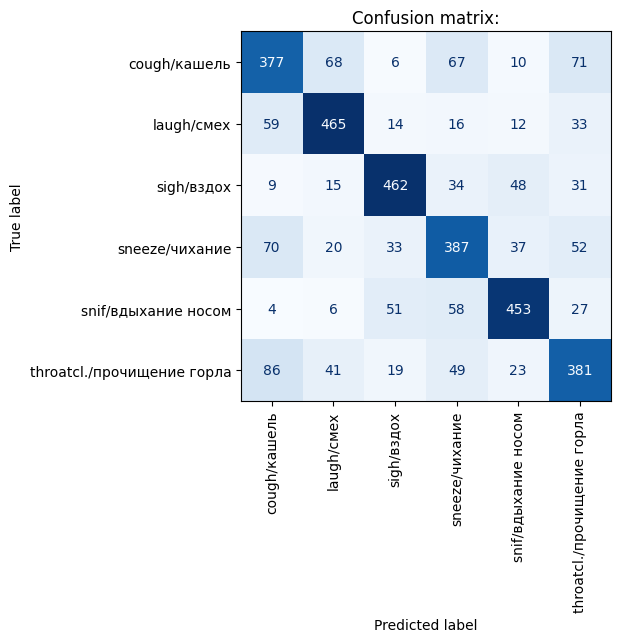

In [19]:
comparing_with_sota_VS(models, names, vocalsound_egemaps_train_val_pca, vocalsound_targets_train_val_egemaps, vocalsound_egemaps_test_pca, vocalsound_targets_test_egemaps)

## INTERSPEECH2009 FEATURES TEST

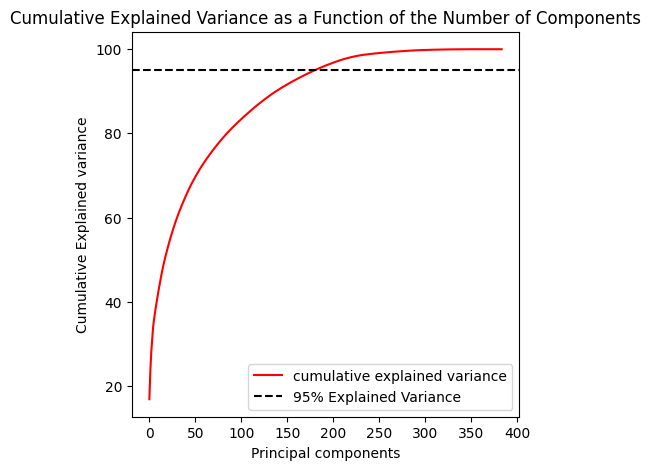

In [37]:
scaler.fit(vocalsound_is09_train)
vocalsound_IS09_train_scaler = scaler.transform(vocalsound_is09_train)
vocalsound_IS09_train_val_scaler = scaler.transform(vocalsound_is09_train_val)
vocalsound_IS09_test_scaler = scaler.transform(vocalsound_is09_test)

plot_relation_between_VAR_and_DIM(vocalsound_IS09_train_scaler)

In [21]:
pca = PCA(.95) 
pca.fit(vocalsound_IS09_train_scaler)
pca.fit(vocalsound_IS09_train_val_scaler)

vocalsound_IS09_train_pca = pca.transform(vocalsound_IS09_train_scaler)
vocalsound_IS09_train_val_pca = pca.transform(vocalsound_IS09_train_val_scaler)
vocalsound_IS09_test_pca = pca.transform(vocalsound_IS09_test_scaler)

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.587    |0.765    |0.477    |
|laugh/смех          |0.680    |0.599    |0.786    |
|sigh/вздох          |0.747    |0.669    |0.844    |
|sneeze/чихание      |0.717    |0.648    |0.802    |
|sniff/вдыхание носом|0.778    |0.743    |0.817    |
|throatcl./проч.горла|0.634    |0.673    |0.600    |
----------------------------------------------------
Weighted average Precision : 0.721                 |
----------------------------------------------------
Weighted average Recall : 0.683                    |
----------------------------------------------------
Weighted average F1 : 0.690                        |
----------------------------------------------------
Accuracy : 0.683                                   |
----------------------------------------------------

Confusion matrix:
[[458  33   8  40

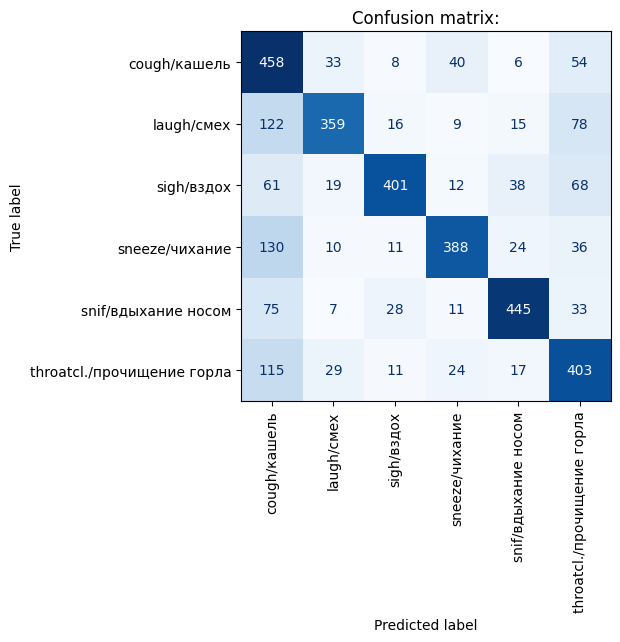

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.706    |0.716    |0.696    |
|laugh/смех          |0.774    |0.783    |0.765    |
|sigh/вздох          |0.812    |0.826    |0.798    |
|sneeze/чихание      |0.793    |0.798    |0.787    |
|sniff/вдыхание носом|0.836    |0.845    |0.827    |
|throatcl./проч.горла|0.704    |0.661    |0.753    |
----------------------------------------------------
Weighted average Precision : 0.771                 |
----------------------------------------------------
Weighted average Recall : 0.772                    |
----------------------------------------------------
Weighted average F1 : 0.771                        |
----------------------------------------------------
Accuracy : 0.772                                   |
----------------------------------------------------

Confusion matrix:
[[429  51  17  48 

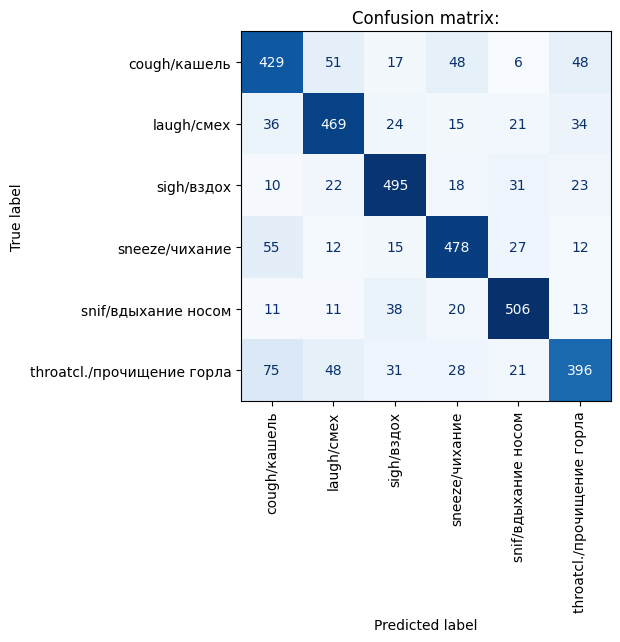

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.513    |0.489    |0.540    |
|laugh/смех          |0.576    |0.629    |0.531    |
|sigh/вздох          |0.680    |0.624    |0.747    |
|sneeze/чихание      |0.621    |0.584    |0.662    |
|sniff/вдыхание носом|0.647    |0.750    |0.570    |
|throatcl./проч.горла|0.545    |0.511    |0.585    |
----------------------------------------------------
Weighted average Precision : 0.606                 |
----------------------------------------------------
Weighted average Recall : 0.598                    |
----------------------------------------------------
Weighted average F1 : 0.597                        |
----------------------------------------------------
Accuracy : 0.598                                   |
----------------------------------------------------

Confusion matrix:
[[293  90   9 

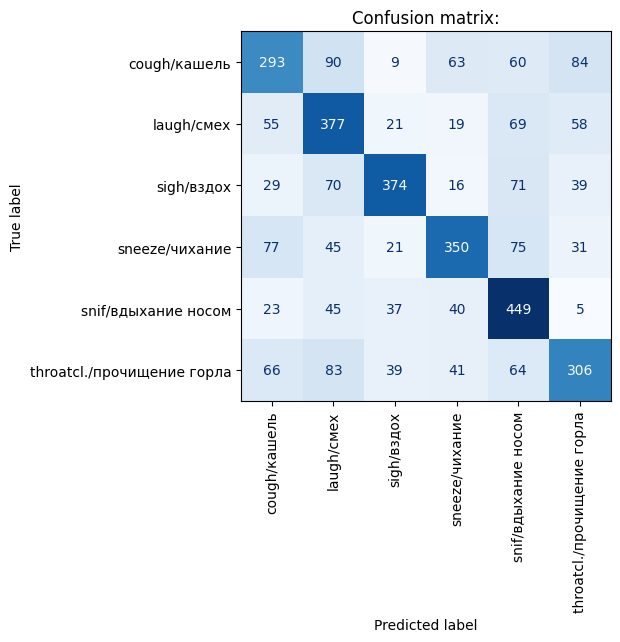

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.652    |0.659    |0.645    |
|laugh/смех          |0.747    |0.755    |0.740    |
|sigh/вздох          |0.755    |0.746    |0.764    |
|sneeze/чихание      |0.762    |0.731    |0.795    |
|sniff/вдыхание носом|0.810    |0.851    |0.773    |
|throatcl./проч.горла|0.656    |0.643    |0.670    |
----------------------------------------------------
Weighted average Precision : 0.731                 |
----------------------------------------------------
Weighted average Recall : 0.731                    |
----------------------------------------------------
Weighted average F1 : 0.730                        |
----------------------------------------------------
Accuracy : 0.731                                   |
----------------------------------------------------

Confusion matrix:
[[395  63  18  48  10 

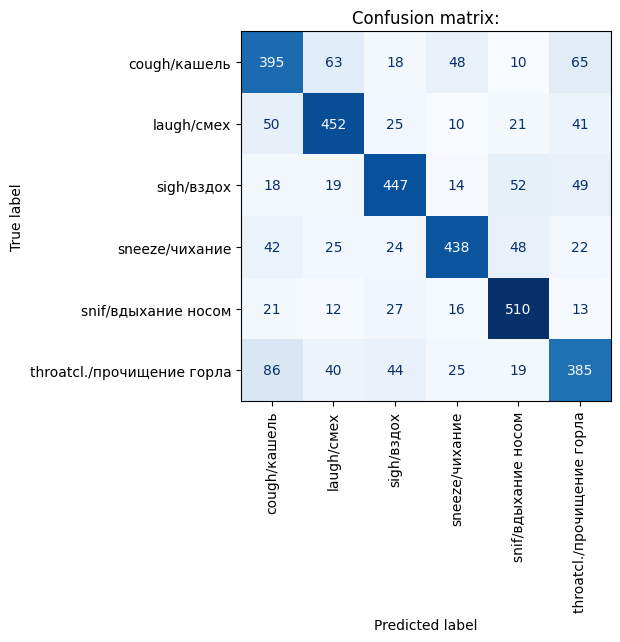

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.466    |0.706    |0.348    |
|laugh/смех          |0.565    |0.543    |0.590    |
|sigh/вздох          |0.575    |0.447    |0.805    |
|sneeze/чихание      |0.583    |0.553    |0.618    |
|sniff/вдыхание носом|0.700    |0.713    |0.688    |
|throatcl./проч.горла|0.447    |0.349    |0.620    |
----------------------------------------------------
Weighted average Precision : 0.611                 |
----------------------------------------------------
Weighted average Recall : 0.552                    |
----------------------------------------------------
Weighted average F1 : 0.556                        |
----------------------------------------------------
Accuracy : 0.552                                   |
----------------------------------------------------

Confusion matrix:
[[423  52  10  56  26 

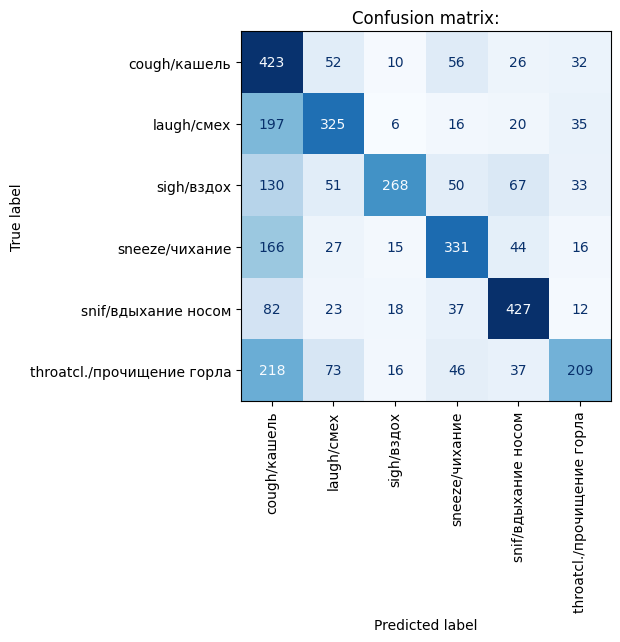

Logistic Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.664    |0.661    |0.668    |
|laugh/смех          |0.749    |0.763    |0.736    |
|sigh/вздох          |0.781    |0.788    |0.774    |
|sneeze/чихание      |0.771    |0.771    |0.770    |
|sniff/вдыхание носом|0.803    |0.818    |0.789    |
|throatcl./проч.горла|0.678    |0.649    |0.709    |
----------------------------------------------------
Weighted average Precision : 0.741                 |
----------------------------------------------------
Weighted average Recall : 0.742                    |
----------------------------------------------------
Weighted average F1 : 0.741                        |
----------------------------------------------------
Accuracy : 0.742                                   |
----------------------------------------------------

Confusion matrix:
[[396 

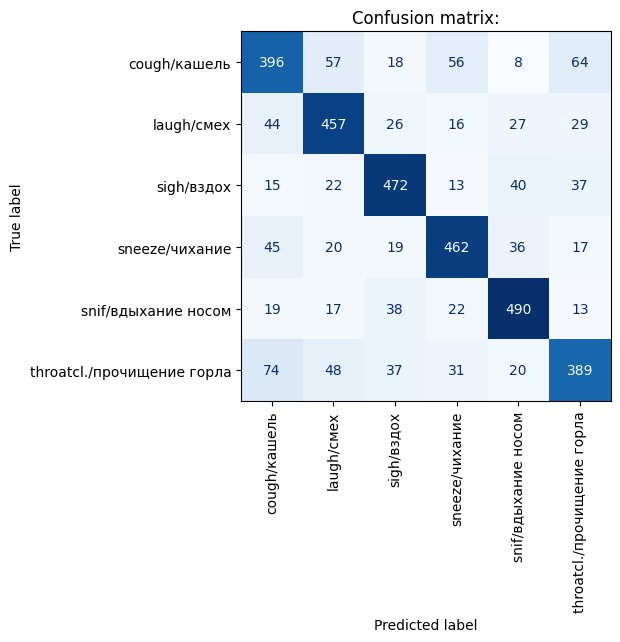

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.319    |0.329    |0.310    |
|laugh/смех          |0.367    |0.366    |0.368    |
|sigh/вздох          |0.435    |0.431    |0.439    |
|sneeze/чихание      |0.377    |0.379    |0.375    |
|sniff/вдыхание носом|0.519    |0.533    |0.506    |
|throatcl./проч.горла|0.332    |0.316    |0.351    |
----------------------------------------------------
Weighted average Precision : 0.391                 |
----------------------------------------------------
Weighted average Recall : 0.392                    |
----------------------------------------------------
Weighted average F1 : 0.391                        |
----------------------------------------------------
Accuracy : 0.392                                   |
----------------------------------------------------

Confusion matrix:
[[197  98  3

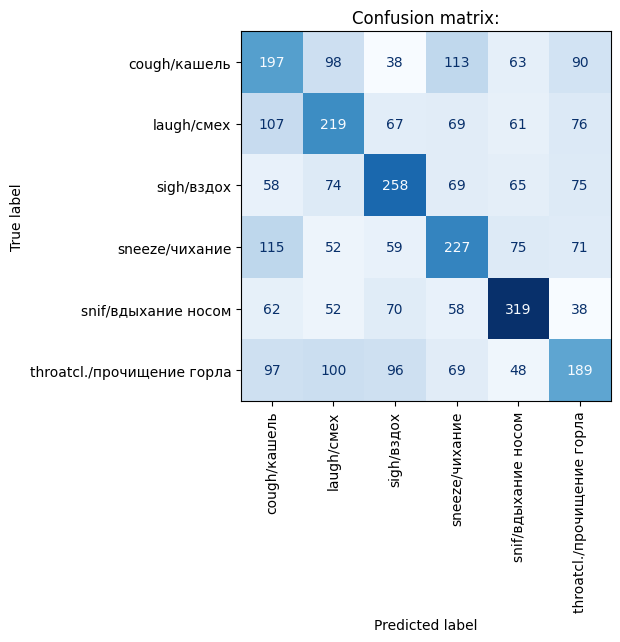

Neural Network:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.648    |0.631    |0.667    |
|laugh/смех          |0.726    |0.721    |0.731    |
|sigh/вздох          |0.791    |0.788    |0.795    |
|sneeze/чихание      |0.740    |0.768    |0.714    |
|sniff/вдыхание носом|0.787    |0.788    |0.785    |
|throatcl./проч.горла|0.652    |0.651    |0.653    |
----------------------------------------------------
Weighted average Precision : 0.724                 |
----------------------------------------------------
Weighted average Recall : 0.725                    |
----------------------------------------------------
Weighted average F1 : 0.724                        |
----------------------------------------------------
Accuracy : 0.725                                   |
----------------------------------------------------

Confusion matrix:
[[378  49  

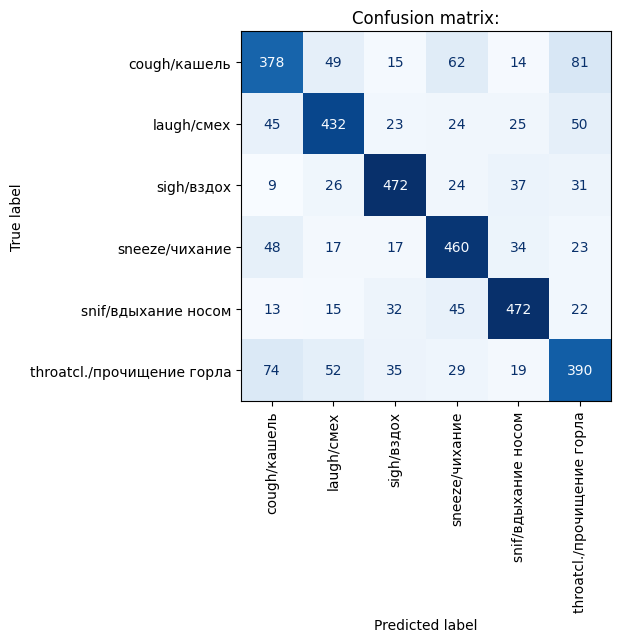

In [22]:
comparing_with_sota_VS(models, names, vocalsound_IS09_train_pca, vocalsound_targets_train_is09, vocalsound_IS09_test_pca, vocalsound_targets_test_is09)

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.587    |0.756    |0.480    |
|laugh/смех          |0.690    |0.613    |0.791    |
|sigh/вздох          |0.752    |0.674    |0.851    |
|sneeze/чихание      |0.719    |0.646    |0.810    |
|sniff/вдыхание носом|0.783    |0.743    |0.827    |
|throatcl./проч.горла|0.632    |0.683    |0.588    |
----------------------------------------------------
Weighted average Precision : 0.724                 |
----------------------------------------------------
Weighted average Recall : 0.686                    |
----------------------------------------------------
Weighted average F1 : 0.694                        |
----------------------------------------------------
Accuracy : 0.686                                   |
----------------------------------------------------

Confusion matrix:
[[453  33   8  38

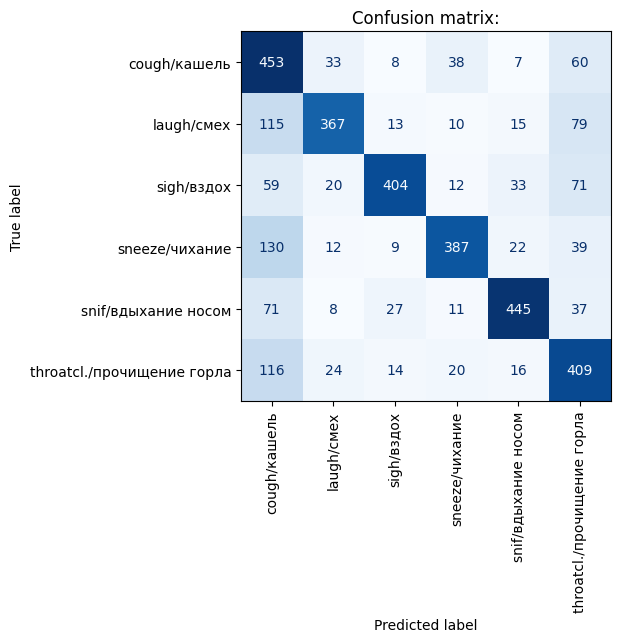

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.711    |0.716    |0.707    |
|laugh/смех          |0.777    |0.786    |0.768    |
|sigh/вздох          |0.808    |0.823    |0.794    |
|sneeze/чихание      |0.794    |0.796    |0.791    |
|sniff/вдыхание носом|0.835    |0.843    |0.827    |
|throatcl./проч.горла|0.701    |0.666    |0.740    |
----------------------------------------------------
Weighted average Precision : 0.771                 |
----------------------------------------------------
Weighted average Recall : 0.772                    |
----------------------------------------------------
Weighted average F1 : 0.771                        |
----------------------------------------------------
Accuracy : 0.772                                   |
----------------------------------------------------

Confusion matrix:
[[429  53  16  45 

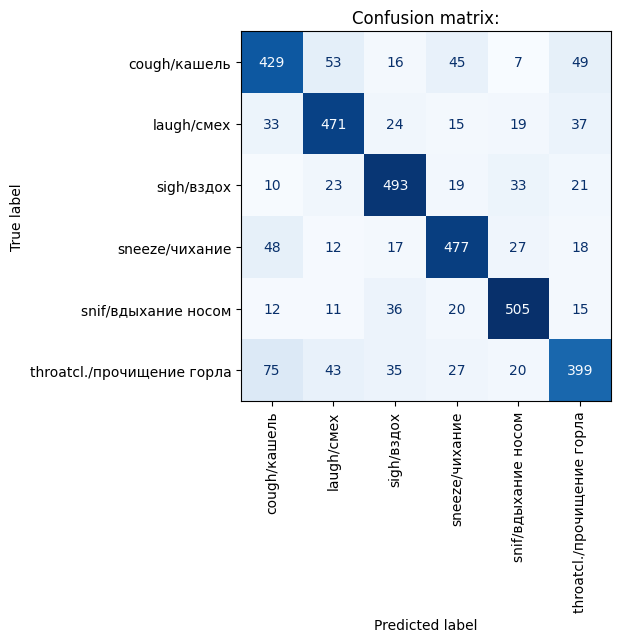

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.485    |0.624    |0.397    |
|laugh/смех          |0.559    |0.564    |0.553    |
|sigh/вздох          |0.690    |0.633    |0.758    |
|sneeze/чихание      |0.647    |0.574    |0.741    |
|sniff/вдыхание носом|0.691    |0.738    |0.649    |
|throatcl./проч.горла|0.517    |0.429    |0.651    |
----------------------------------------------------
Weighted average Precision : 0.625                 |
----------------------------------------------------
Weighted average Recall : 0.594                    |
----------------------------------------------------
Weighted average F1 : 0.598                        |
----------------------------------------------------
Accuracy : 0.594                                   |
----------------------------------------------------

Confusion matrix:
[[374  89  15 

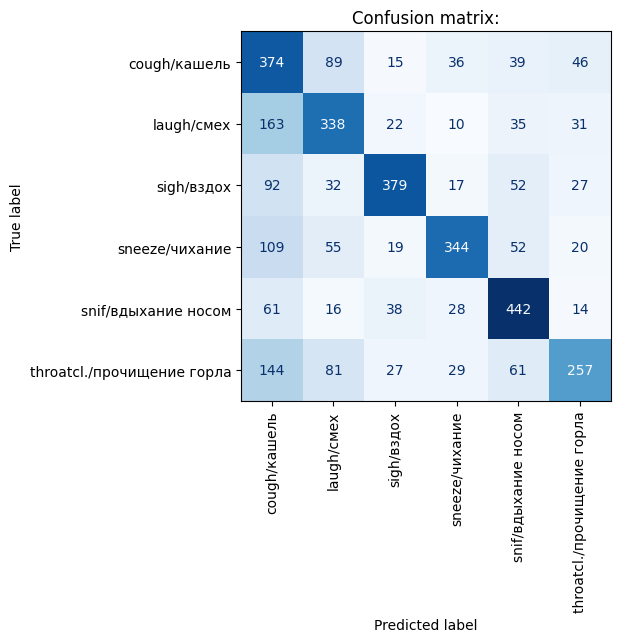

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.645    |0.651    |0.639    |
|laugh/смех          |0.741    |0.751    |0.732    |
|sigh/вздох          |0.757    |0.748    |0.767    |
|sneeze/чихание      |0.757    |0.726    |0.791    |
|sniff/вдыхание носом|0.807    |0.846    |0.772    |
|throatcl./проч.горла|0.656    |0.644    |0.668    |
----------------------------------------------------
Weighted average Precision : 0.728                 |
----------------------------------------------------
Weighted average Recall : 0.728                    |
----------------------------------------------------
Weighted average F1 : 0.727                        |
----------------------------------------------------
Accuracy : 0.728                                   |
----------------------------------------------------

Confusion matrix:
[[390  64  20  46  10 

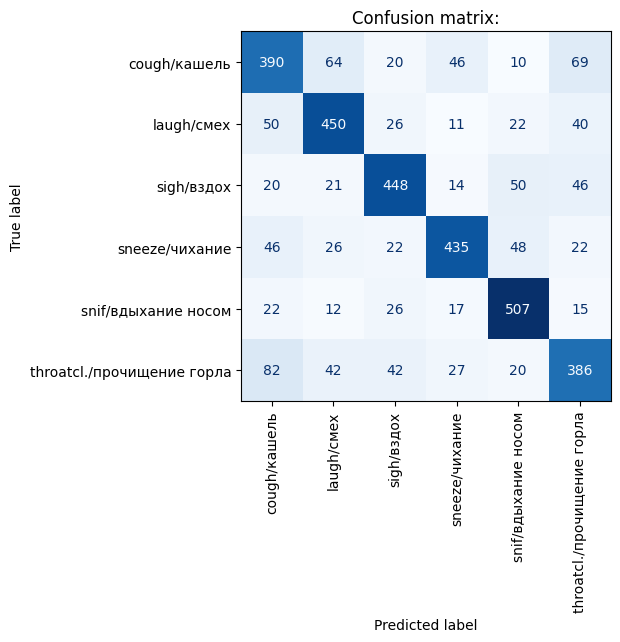

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.471    |0.708    |0.352    |
|laugh/смех          |0.564    |0.543    |0.588    |
|sigh/вздох          |0.581    |0.454    |0.805    |
|sneeze/чихание      |0.595    |0.568    |0.626    |
|sniff/вдыхание носом|0.699    |0.716    |0.683    |
|throatcl./проч.горла|0.440    |0.341    |0.620    |
----------------------------------------------------
Weighted average Precision : 0.612                 |
----------------------------------------------------
Weighted average Recall : 0.555                    |
----------------------------------------------------
Weighted average F1 : 0.558                        |
----------------------------------------------------
Accuracy : 0.555                                   |
----------------------------------------------------

Confusion matrix:
[[424  51  12  59  22 

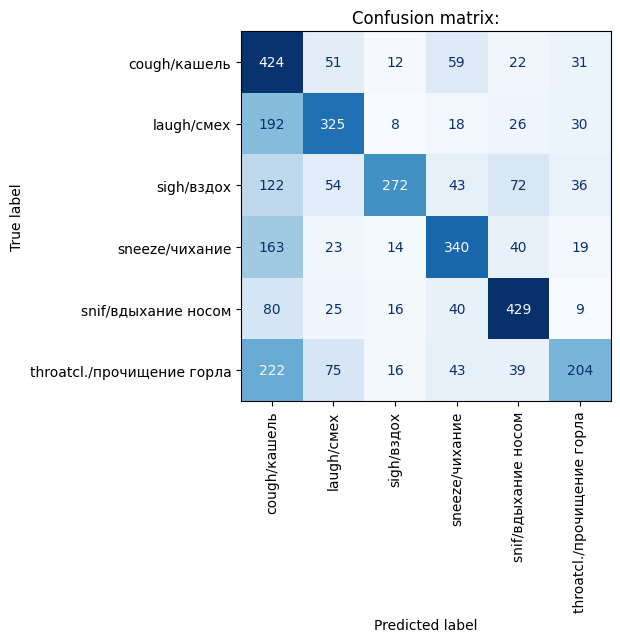

Logistic Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.659    |0.656    |0.663    |
|laugh/смех          |0.754    |0.766    |0.743    |
|sigh/вздох          |0.785    |0.791    |0.780    |
|sneeze/чихание      |0.765    |0.765    |0.766    |
|sniff/вдыхание носом|0.808    |0.820    |0.796    |
|throatcl./проч.горла|0.683    |0.661    |0.707    |
----------------------------------------------------
Weighted average Precision : 0.742                 |
----------------------------------------------------
Weighted average Recall : 0.743                    |
----------------------------------------------------
Weighted average F1 : 0.743                        |
----------------------------------------------------
Accuracy : 0.743                                   |
----------------------------------------------------

Confusion matrix:
[[393 

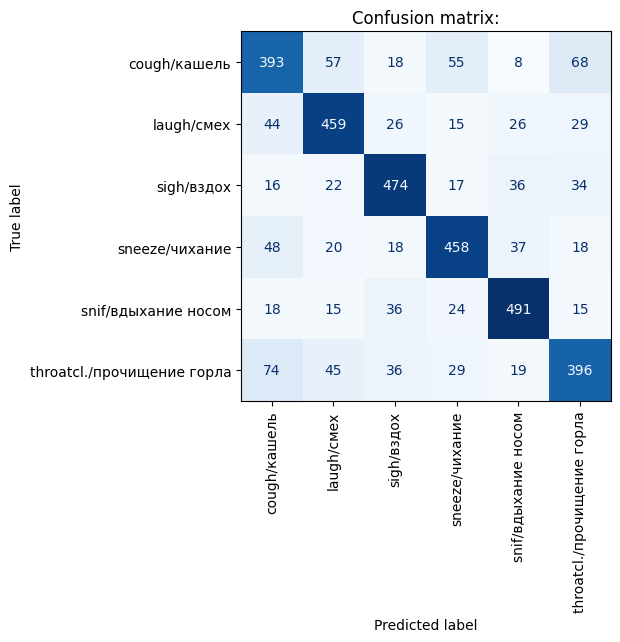

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.286    |0.279    |0.295    |
|laugh/смех          |0.379    |0.371    |0.388    |
|sigh/вздох          |0.468    |0.474    |0.463    |
|sneeze/чихание      |0.420    |0.424    |0.416    |
|sniff/вдыхание носом|0.500    |0.508    |0.493    |
|throatcl./проч.горла|0.347    |0.351    |0.343    |
----------------------------------------------------
Weighted average Precision : 0.399                 |
----------------------------------------------------
Weighted average Recall : 0.401                    |
----------------------------------------------------
Weighted average F1 : 0.400                        |
----------------------------------------------------
Accuracy : 0.401                                   |
----------------------------------------------------

Confusion matrix:
[[167  95  5

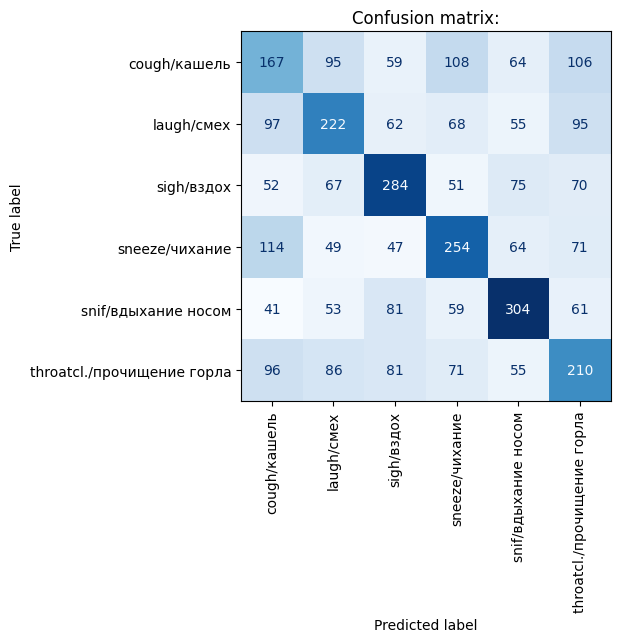

Neural Network:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.666    |0.649    |0.682    |
|laugh/смех          |0.745    |0.736    |0.754    |
|sigh/вздох          |0.782    |0.771    |0.792    |
|sneeze/чихание      |0.748    |0.780    |0.718    |
|sniff/вдыхание носом|0.787    |0.795    |0.780    |
|throatcl./проч.горла|0.654    |0.653    |0.656    |
----------------------------------------------------
Weighted average Precision : 0.731                 |
----------------------------------------------------
Weighted average Recall : 0.731                    |
----------------------------------------------------
Weighted average F1 : 0.730                        |
----------------------------------------------------
Accuracy : 0.731                                   |
----------------------------------------------------

Confusion matrix:
[[389  41  

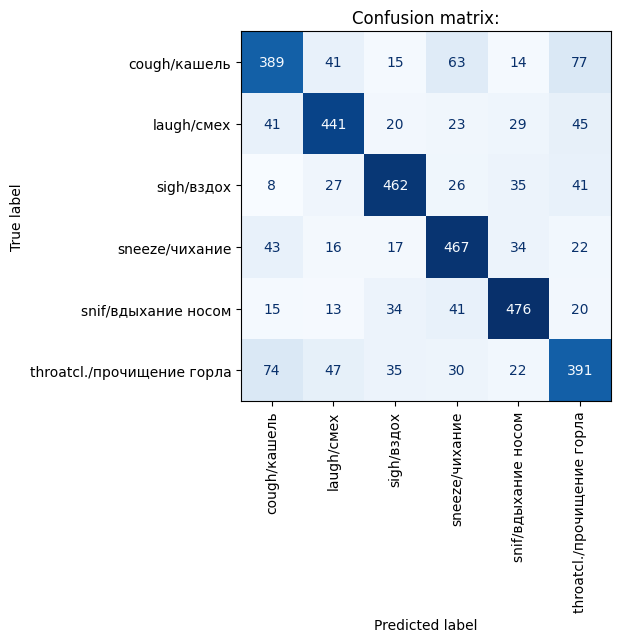

In [23]:
comparing_with_sota_VS(models, names, vocalsound_IS09_train_val_pca, vocalsound_targets_train_val_is09, vocalsound_IS09_test_pca, vocalsound_targets_test_is09)

## INTERSPEECH2010 FEATURES TEST

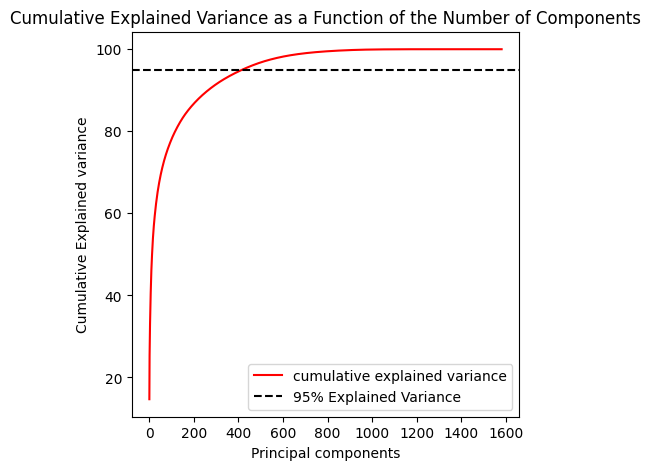

In [36]:
scaler.fit(vocalsound_is10_train)
vocalsound_IS10_train_scaler = scaler.transform(vocalsound_is10_train)
vocalsound_IS10_train_val_scaler = scaler.transform(vocalsound_is10_train_val)
vocalsound_IS10_test_scaler = scaler.transform(vocalsound_is10_test)

plot_relation_between_VAR_and_DIM(vocalsound_IS10_train_scaler)

In [25]:
pca = PCA(.95) 
pca.fit(vocalsound_IS10_train_scaler)
pca.fit(vocalsound_IS10_train_val_scaler)

vocalsound_IS10_train_pca = pca.transform(vocalsound_IS10_train_scaler)
vocalsound_IS10_train_val_pca = pca.transform(vocalsound_IS10_train_val_scaler)
vocalsound_IS10_test_pca = pca.transform(vocalsound_IS10_test_scaler)

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.737    |0.778    |0.700    |
|laugh/смех          |0.778    |0.676    |0.916    |
|sigh/вздох          |0.804    |0.761    |0.852    |
|sneeze/чихание      |0.732    |0.800    |0.676    |
|sniff/вдыхание носом|0.801    |0.765    |0.840    |
|throatcl./проч.горла|0.676    |0.731    |0.628    |
----------------------------------------------------
Weighted average Precision : 0.769                 |
----------------------------------------------------
Weighted average Recall : 0.752                    |
----------------------------------------------------
Weighted average F1 : 0.755                        |
----------------------------------------------------
Accuracy : 0.752                                   |
----------------------------------------------------

Confusion matrix:
[[466  10   5  38

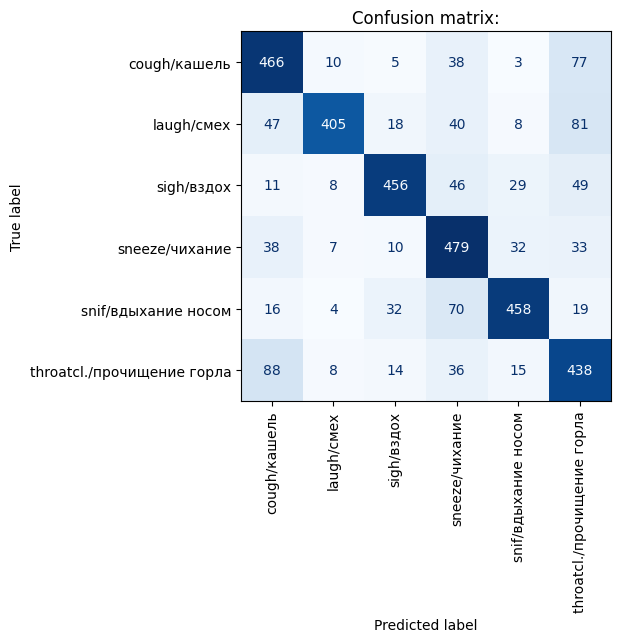

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.794    |0.805    |0.784    |
|laugh/смех          |0.869    |0.871    |0.867    |
|sigh/вздох          |0.854    |0.866    |0.843    |
|sneeze/чихание      |0.826    |0.828    |0.824    |
|sniff/вдыхание носом|0.860    |0.870    |0.850    |
|throatcl./проч.горла|0.774    |0.740    |0.811    |
----------------------------------------------------
Weighted average Precision : 0.830                 |
----------------------------------------------------
Weighted average Recall : 0.830                    |
----------------------------------------------------
Weighted average F1 : 0.830                        |
----------------------------------------------------
Accuracy : 0.830                                   |
----------------------------------------------------

Confusion matrix:
[[482  20   7  35 

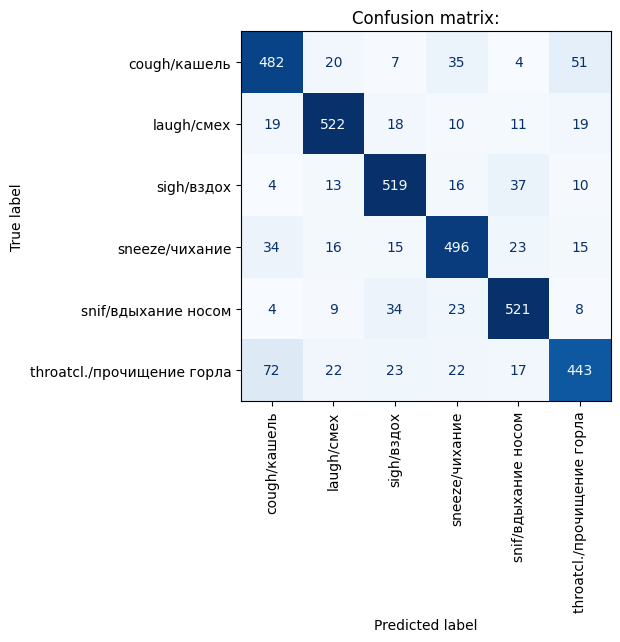

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.647    |0.628    |0.668    |
|laugh/смех          |0.639    |0.728    |0.570    |
|sigh/вздох          |0.751    |0.691    |0.821    |
|sneeze/чихание      |0.578    |0.693    |0.496    |
|sniff/вдыхание носом|0.738    |0.666    |0.826    |
|throatcl./проч.горла|0.656    |0.571    |0.772    |
----------------------------------------------------
Weighted average Precision : 0.692                 |
----------------------------------------------------
Weighted average Recall : 0.663                    |
----------------------------------------------------
Weighted average F1 : 0.668                        |
----------------------------------------------------
Accuracy : 0.663                                   |
----------------------------------------------------

Confusion matrix:
[[376  80   3 

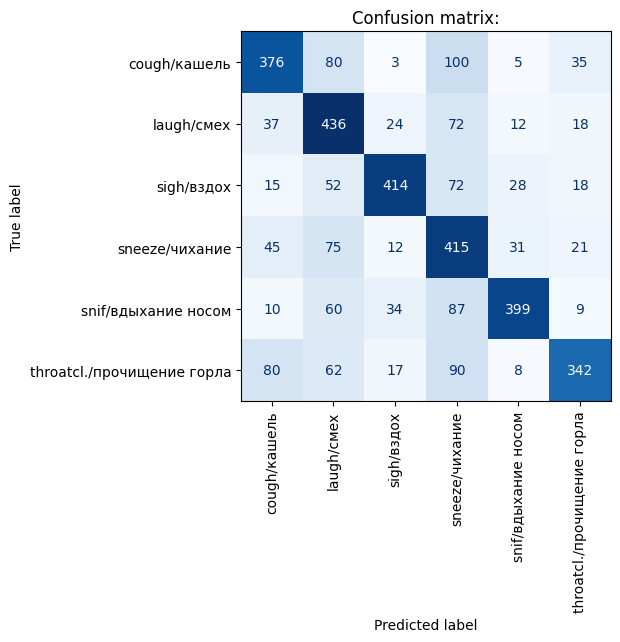

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.796    |0.826    |0.767    |
|laugh/смех          |0.873    |0.841    |0.908    |
|sigh/вздох          |0.831    |0.831    |0.830    |
|sneeze/чихание      |0.833    |0.868    |0.801    |
|sniff/вдыхание носом|0.864    |0.873    |0.855    |
|throatcl./проч.горла|0.742    |0.701    |0.788    |
----------------------------------------------------
Weighted average Precision : 0.825                 |
----------------------------------------------------
Weighted average Recall : 0.824                    |
----------------------------------------------------
Weighted average F1 : 0.823                        |
----------------------------------------------------
Accuracy : 0.824                                   |
----------------------------------------------------

Confusion matrix:
[[495  14   7  37   2 

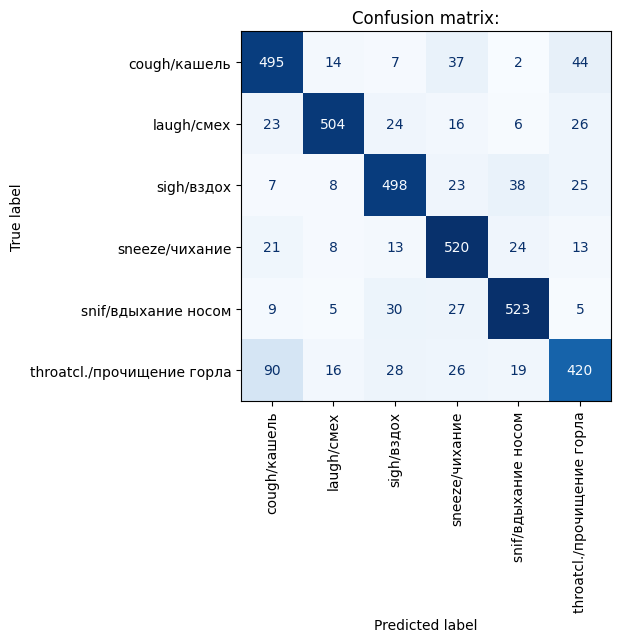

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.562    |0.760    |0.446    |
|laugh/смех          |0.713    |0.623    |0.833    |
|sigh/вздох          |0.755    |0.688    |0.837    |
|sneeze/чихание      |0.588    |0.608    |0.569    |
|sniff/вдыхание носом|0.769    |0.746    |0.794    |
|throatcl./проч.горла|0.528    |0.454    |0.631    |
----------------------------------------------------
Weighted average Precision : 0.685                 |
----------------------------------------------------
Weighted average Recall : 0.646                    |
----------------------------------------------------
Weighted average F1 : 0.652                        |
----------------------------------------------------
Accuracy : 0.646                                   |
----------------------------------------------------

Confusion matrix:
[[455  13   4  59  10 

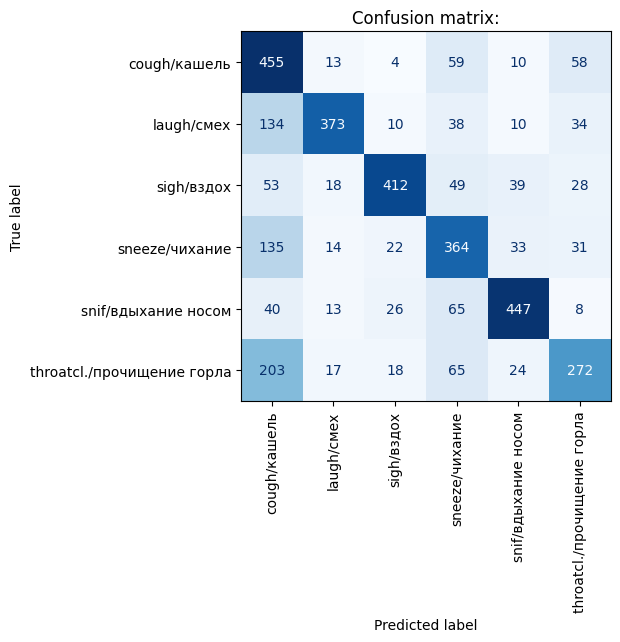

Logistic Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.791    |0.810    |0.774    |
|laugh/смех          |0.856    |0.858    |0.854    |
|sigh/вздох          |0.832    |0.838    |0.826    |
|sneeze/чихание      |0.833    |0.840    |0.827    |
|sniff/вдыхание носом|0.848    |0.855    |0.842    |
|throatcl./проч.горла|0.761    |0.725    |0.802    |
----------------------------------------------------
Weighted average Precision : 0.821                 |
----------------------------------------------------
Weighted average Recall : 0.821                    |
----------------------------------------------------
Weighted average F1 : 0.820                        |
----------------------------------------------------
Accuracy : 0.821                                   |
----------------------------------------------------

Confusion matrix:
[[485 

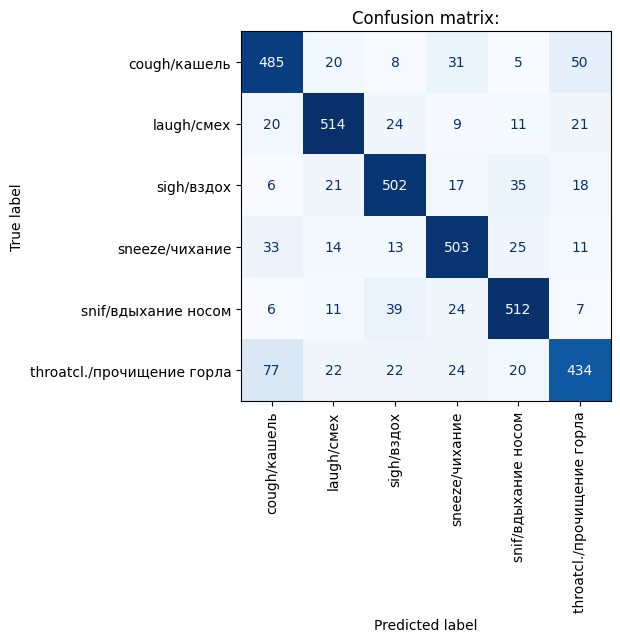

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.372    |0.379    |0.366    |
|laugh/смех          |0.469    |0.454    |0.485    |
|sigh/вздох          |0.482    |0.487    |0.477    |
|sneeze/чихание      |0.346    |0.356    |0.336    |
|sniff/вдыхание носом|0.506    |0.499    |0.514    |
|throatcl./проч.горла|0.359    |0.356    |0.363    |
----------------------------------------------------
Weighted average Precision : 0.424                 |
----------------------------------------------------
Weighted average Recall : 0.422                    |
----------------------------------------------------
Weighted average F1 : 0.423                        |
----------------------------------------------------
Accuracy : 0.422                                   |
----------------------------------------------------

Confusion matrix:
[[227  71  4

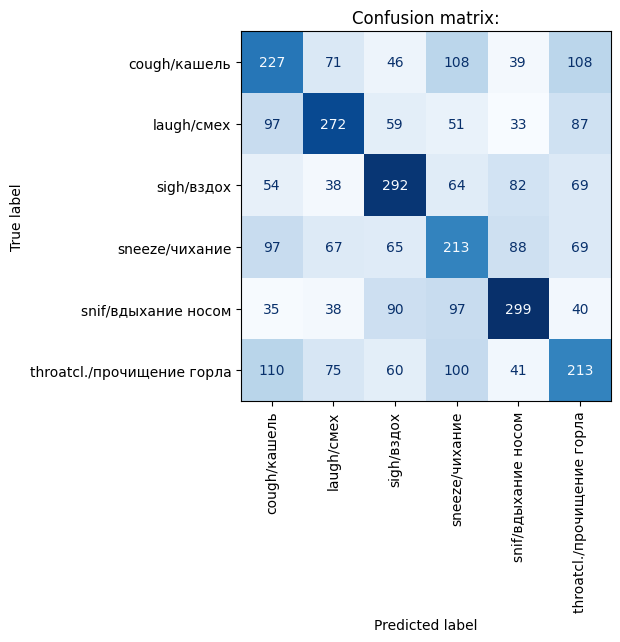

Neural Network:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.784    |0.790    |0.778    |
|laugh/смех          |0.864    |0.863    |0.865    |
|sigh/вздох          |0.847    |0.848    |0.845    |
|sneeze/чихание      |0.847    |0.855    |0.839    |
|sniff/вдыхание носом|0.857    |0.876    |0.839    |
|throatcl./проч.горла|0.748    |0.718    |0.780    |
----------------------------------------------------
Weighted average Precision : 0.824                 |
----------------------------------------------------
Weighted average Recall : 0.825                    |
----------------------------------------------------
Weighted average F1 : 0.824                        |
----------------------------------------------------
Accuracy : 0.825                                   |
----------------------------------------------------

Confusion matrix:
[[473  22  

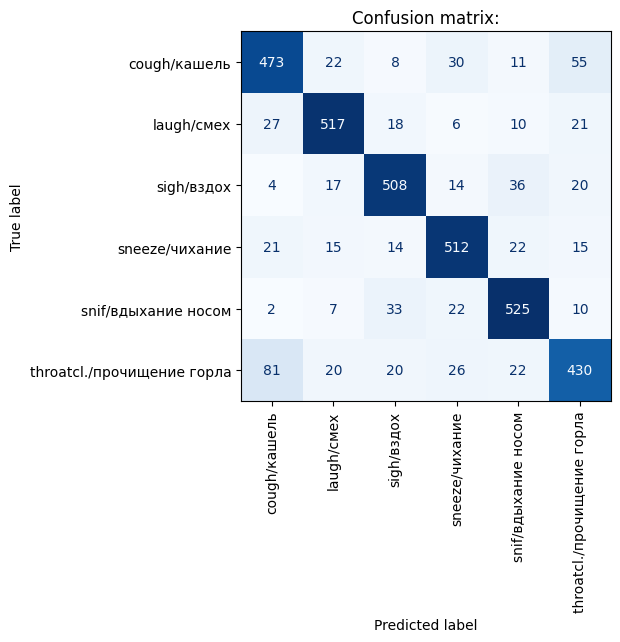

In [26]:
comparing_with_sota_VS(models, names, vocalsound_IS10_train_pca, vocalsound_targets_train_is10, vocalsound_IS10_test_pca, vocalsound_targets_test_is10)

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.737    |0.780    |0.698    |
|laugh/смех          |0.780    |0.689    |0.898    |
|sigh/вздох          |0.807    |0.756    |0.865    |
|sneeze/чихание      |0.743    |0.803    |0.692    |
|sniff/вдыхание носом|0.808    |0.775    |0.845    |
|throatcl./проч.горла|0.674    |0.730    |0.627    |
----------------------------------------------------
Weighted average Precision : 0.771                 |
----------------------------------------------------
Weighted average Recall : 0.755                    |
----------------------------------------------------
Weighted average F1 : 0.758                        |
----------------------------------------------------
Accuracy : 0.755                                   |
----------------------------------------------------

Confusion matrix:
[[467  13   4  38

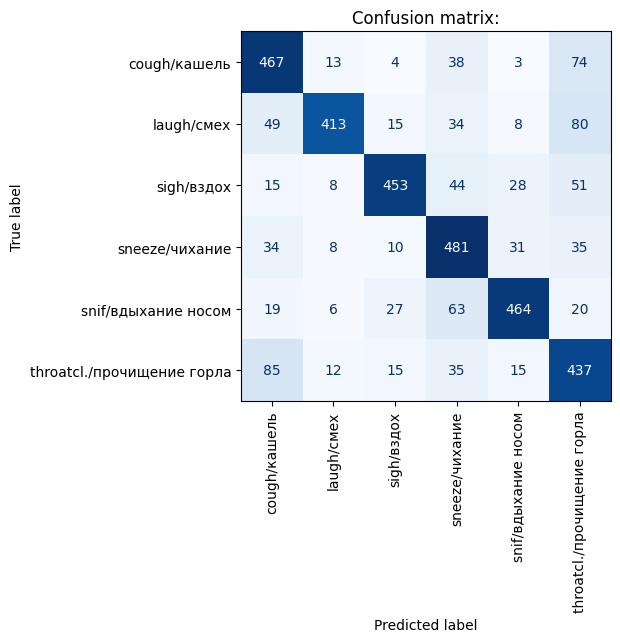

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.787    |0.796    |0.778    |
|laugh/смех          |0.871    |0.871    |0.871    |
|sigh/вздох          |0.856    |0.870    |0.842    |
|sneeze/чихание      |0.828    |0.835    |0.821    |
|sniff/вдыхание носом|0.862    |0.868    |0.855    |
|throatcl./проч.горла|0.772    |0.738    |0.810    |
----------------------------------------------------
Weighted average Precision : 0.830                 |
----------------------------------------------------
Weighted average Recall : 0.830                    |
----------------------------------------------------
Weighted average F1 : 0.829                        |
----------------------------------------------------
Accuracy : 0.830                                   |
----------------------------------------------------

Confusion matrix:
[[477  22   8  37 

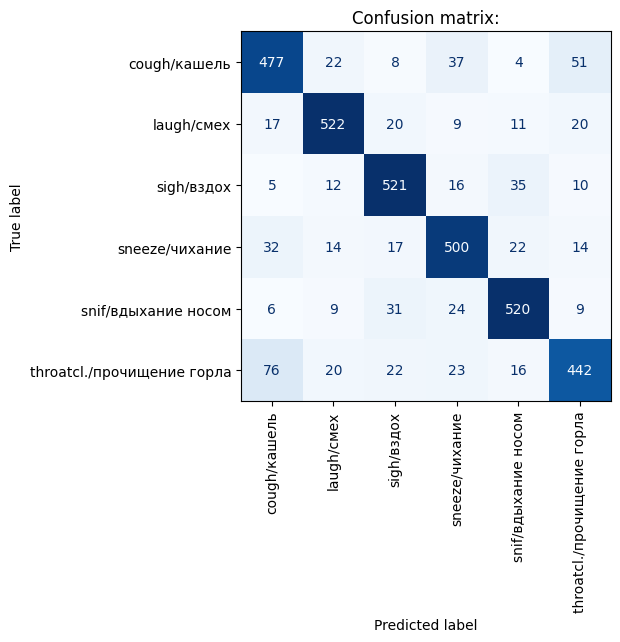

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.652    |0.661    |0.644    |
|laugh/смех          |0.649    |0.725    |0.587    |
|sigh/вздох          |0.713    |0.699    |0.726    |
|sneeze/чихание      |0.586    |0.683    |0.513    |
|sniff/вдыхание носом|0.735    |0.654    |0.838    |
|throatcl./проч.горла|0.641    |0.533    |0.804    |
----------------------------------------------------
Weighted average Precision : 0.685                 |
----------------------------------------------------
Weighted average Recall : 0.659                    |
----------------------------------------------------
Weighted average F1 : 0.662                        |
----------------------------------------------------
Accuracy : 0.659                                   |
----------------------------------------------------

Confusion matrix:
[[396  84  11 

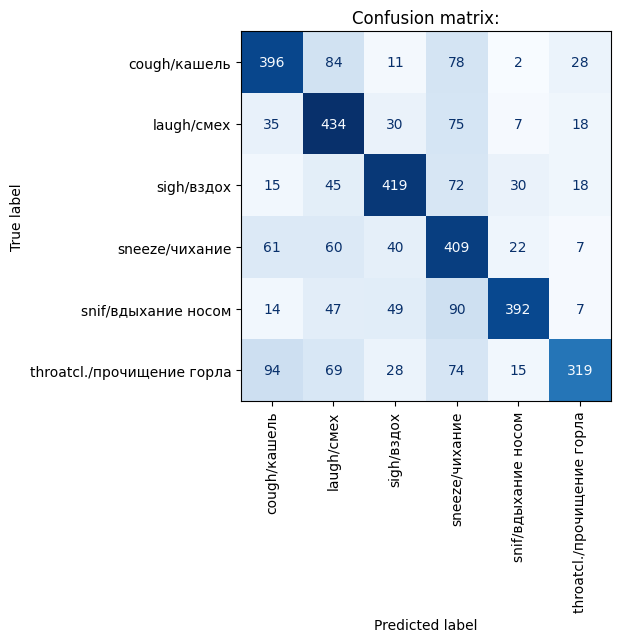

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.797    |0.821    |0.775    |
|laugh/смех          |0.868    |0.835    |0.904    |
|sigh/вздох          |0.829    |0.833    |0.825    |
|sneeze/чихание      |0.833    |0.873    |0.797    |
|sniff/вдыхание носом|0.865    |0.868    |0.861    |
|throatcl./проч.горла|0.747    |0.711    |0.787    |
----------------------------------------------------
Weighted average Precision : 0.825                 |
----------------------------------------------------
Weighted average Recall : 0.824                    |
----------------------------------------------------
Weighted average F1 : 0.823                        |
----------------------------------------------------
Accuracy : 0.824                                   |
----------------------------------------------------

Confusion matrix:
[[492  16   8  35   2 

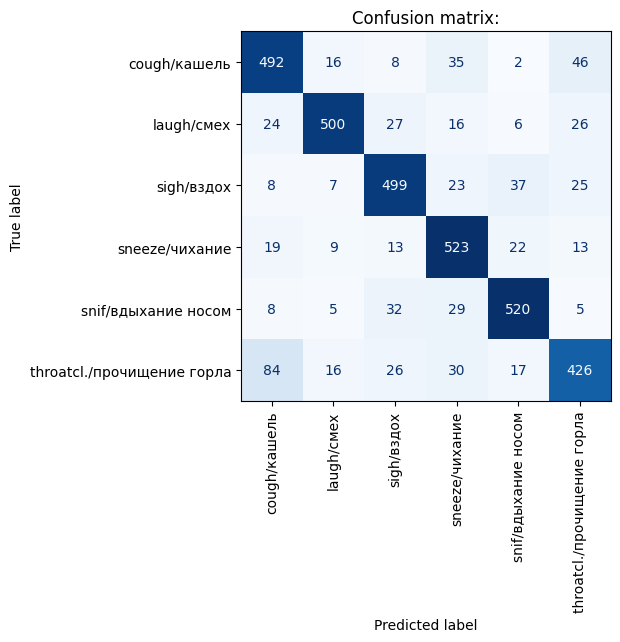

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.570    |0.768    |0.453    |
|laugh/смех          |0.717    |0.631    |0.829    |
|sigh/вздох          |0.746    |0.681    |0.824    |
|sneeze/чихание      |0.607    |0.621    |0.594    |
|sniff/вдыхание носом|0.760    |0.741    |0.779    |
|throatcl./проч.горла|0.530    |0.456    |0.633    |
----------------------------------------------------
Weighted average Precision : 0.685                 |
----------------------------------------------------
Weighted average Recall : 0.650                    |
----------------------------------------------------
Weighted average F1 : 0.655                        |
----------------------------------------------------
Accuracy : 0.650                                   |
----------------------------------------------------

Confusion matrix:
[[460  14   6  53  12 

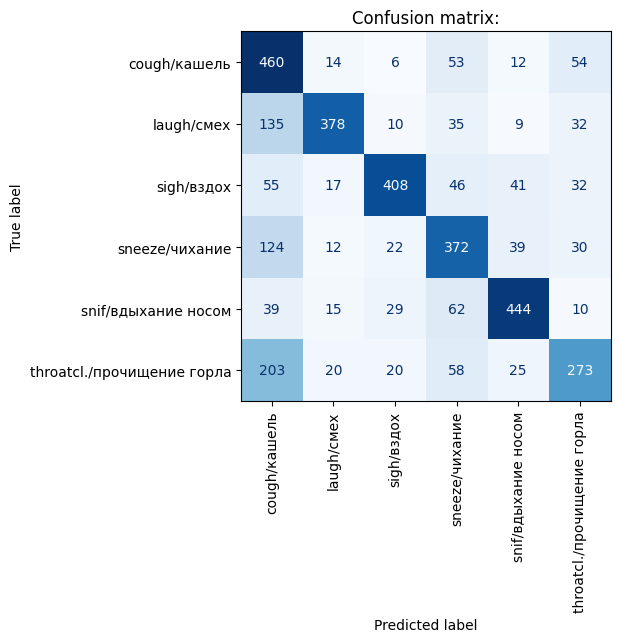

Logistic Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.796    |0.808    |0.784    |
|laugh/смех          |0.856    |0.866    |0.847    |
|sigh/вздох          |0.834    |0.841    |0.828    |
|sneeze/чихание      |0.842    |0.850    |0.834    |
|sniff/вдыхание носом|0.857    |0.858    |0.855    |
|throatcl./проч.горла|0.766    |0.731    |0.805    |
----------------------------------------------------
Weighted average Precision : 0.826                 |
----------------------------------------------------
Weighted average Recall : 0.826                    |
----------------------------------------------------
Weighted average F1 : 0.825                        |
----------------------------------------------------
Accuracy : 0.826                                   |
----------------------------------------------------

Confusion matrix:
[[484 

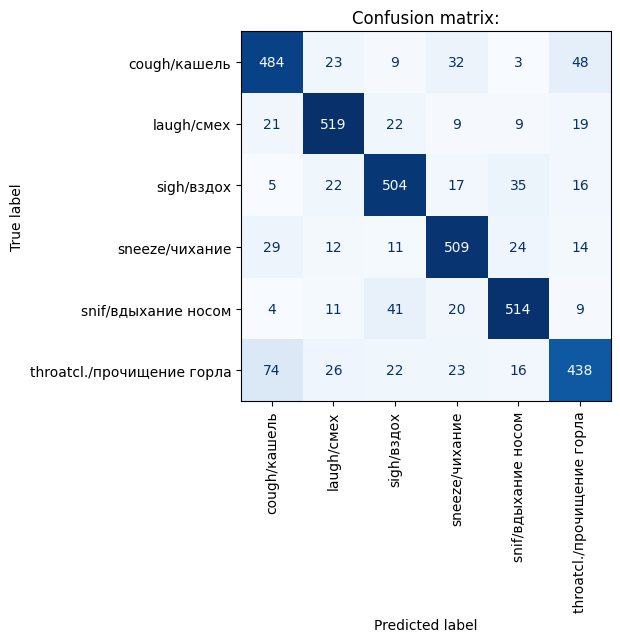

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.371    |0.374    |0.368    |
|laugh/смех          |0.515    |0.518    |0.513    |
|sigh/вздох          |0.492    |0.508    |0.476    |
|sneeze/чихание      |0.322    |0.312    |0.332    |
|sniff/вдыхание носом|0.521    |0.523    |0.519    |
|throatcl./проч.горла|0.337    |0.331    |0.343    |
----------------------------------------------------
Weighted average Precision : 0.425                 |
----------------------------------------------------
Weighted average Recall : 0.427                    |
----------------------------------------------------
Weighted average F1 : 0.426                        |
----------------------------------------------------
Accuracy : 0.427                                   |
----------------------------------------------------

Confusion matrix:
[[224  78  5

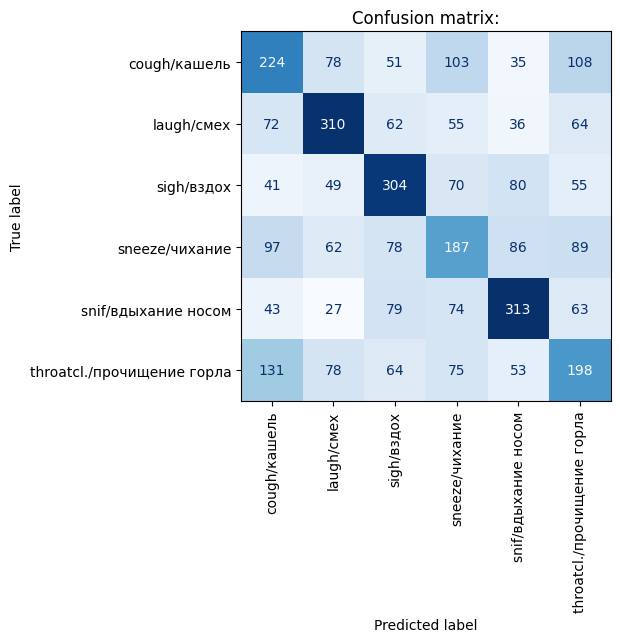

Neural Network:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.798    |0.805    |0.791    |
|laugh/смех          |0.856    |0.856    |0.855    |
|sigh/вздох          |0.856    |0.860    |0.853    |
|sneeze/чихание      |0.843    |0.853    |0.834    |
|sniff/вдыхание носом|0.859    |0.870    |0.849    |
|throatcl./проч.горла|0.772    |0.743    |0.803    |
----------------------------------------------------
Weighted average Precision : 0.831                 |
----------------------------------------------------
Weighted average Recall : 0.831                    |
----------------------------------------------------
Weighted average F1 : 0.831                        |
----------------------------------------------------
Accuracy : 0.831                                   |
----------------------------------------------------

Confusion matrix:
[[482  25  

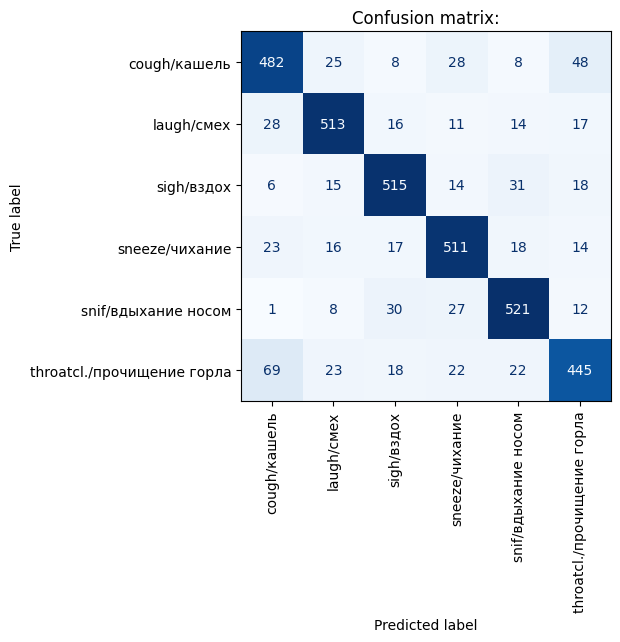

In [27]:
comparing_with_sota_VS(models, names, vocalsound_IS10_train_val_pca, vocalsound_targets_train_val_is10, vocalsound_IS10_test_pca, vocalsound_targets_test_is10)

## INTERSPEECH2013 FEATURES TEST

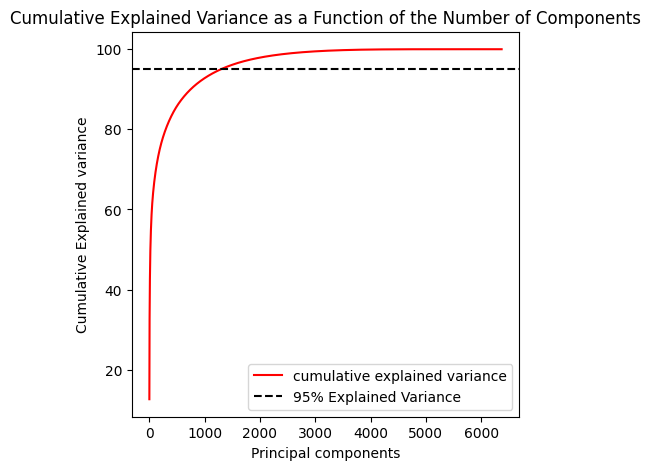

In [35]:
scaler.fit(vocalsound_is13_train)
vocalsound_IS13_train_scaler = scaler.transform(vocalsound_is13_train)
vocalsound_IS13_train_val_scaler = scaler.transform(vocalsound_is13_train_val)
vocalsound_IS13_test_scaler = scaler.transform(vocalsound_is13_test)

plot_relation_between_VAR_and_DIM(vocalsound_IS13_train_scaler)

In [29]:
pca = PCA(.95) 
pca.fit(vocalsound_IS13_train_scaler)
pca.fit(vocalsound_IS13_train_val_scaler)

vocalsound_IS13_train_pca = pca.transform(vocalsound_IS13_train_scaler)
vocalsound_IS13_train_val_pca = pca.transform(vocalsound_IS13_train_val_scaler)
vocalsound_IS13_test_pca = pca.transform(vocalsound_IS13_test_scaler)

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.646    |0.536    |0.813    |
|laugh/смех          |0.725    |0.624    |0.864    |
|sigh/вздох          |0.808    |0.753    |0.871    |
|sneeze/чихание      |0.770    |0.765    |0.776    |
|sniff/вдыхание носом|0.829    |0.776    |0.889    |
|throatcl./проч.горла|0.559    |0.810    |0.427    |
----------------------------------------------------
Weighted average Precision : 0.773                 |
----------------------------------------------------
Weighted average Recall : 0.711                    |
----------------------------------------------------
Weighted average F1 : 0.723                        |
----------------------------------------------------
Accuracy : 0.711                                   |
----------------------------------------------------

Confusion matrix:
[[321  16   4  36

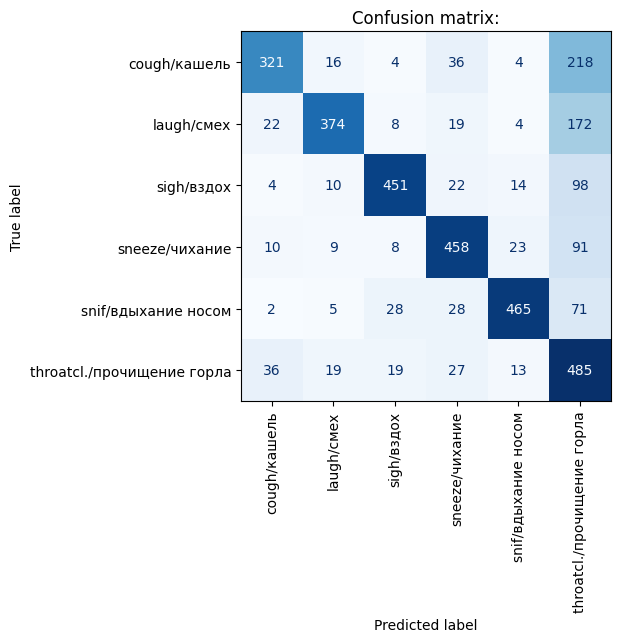

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.843    |0.851    |0.835    |
|laugh/смех          |0.888    |0.881    |0.895    |
|sigh/вздох          |0.883    |0.885    |0.880    |
|sneeze/чихание      |0.839    |0.866    |0.813    |
|sniff/вдыхание носом|0.875    |0.881    |0.868    |
|throatcl./проч.горла|0.797    |0.761    |0.837    |
----------------------------------------------------
Weighted average Precision : 0.855                 |
----------------------------------------------------
Weighted average Recall : 0.854                    |
----------------------------------------------------
Weighted average F1 : 0.854                        |
----------------------------------------------------
Accuracy : 0.854                                   |
----------------------------------------------------

Confusion matrix:
[[510  19   5  26 

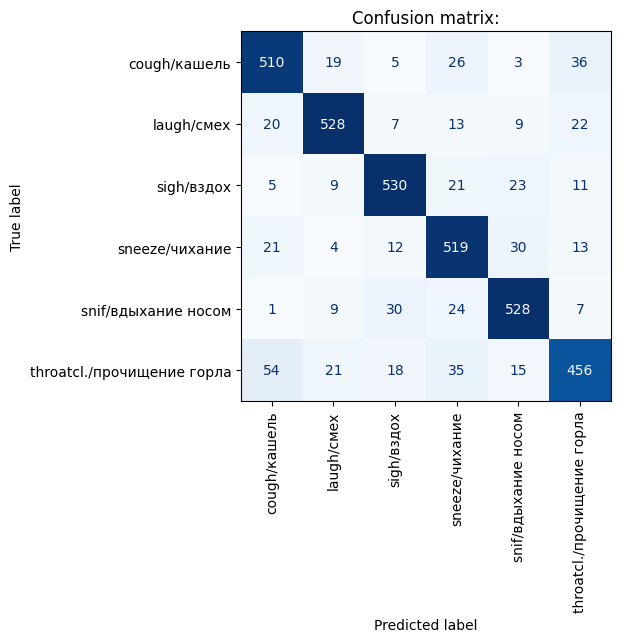

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.608    |0.738    |0.517    |
|laugh/смех          |0.736    |0.746    |0.726    |
|sigh/вздох          |0.748    |0.790    |0.710    |
|sneeze/чихание      |0.709    |0.666    |0.757    |
|sniff/вдыхание носом|0.784    |0.738    |0.836    |
|throatcl./проч.горла|0.628    |0.524    |0.783    |
----------------------------------------------------
Weighted average Precision : 0.721                 |
----------------------------------------------------
Weighted average Recall : 0.700                    |
----------------------------------------------------
Weighted average F1 : 0.702                        |
----------------------------------------------------
Accuracy : 0.700                                   |
----------------------------------------------------

Confusion matrix:
[[442  36  35 

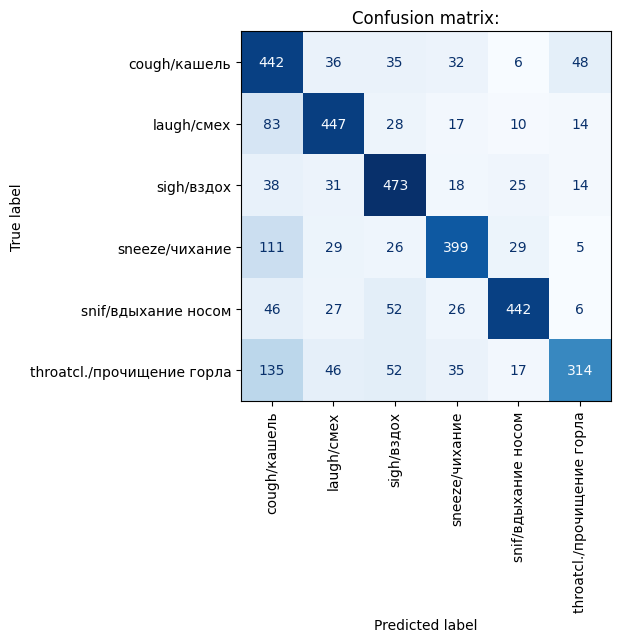

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.854    |0.866    |0.843    |
|laugh/смех          |0.910    |0.903    |0.917    |
|sigh/вздох          |0.892    |0.885    |0.900    |
|sneeze/чихание      |0.857    |0.873    |0.842    |
|sniff/вдыхание носом|0.891    |0.900    |0.882    |
|throatcl./проч.горла|0.820    |0.798    |0.843    |
----------------------------------------------------
Weighted average Precision : 0.871                 |
----------------------------------------------------
Weighted average Recall : 0.871                    |
----------------------------------------------------
Weighted average F1 : 0.871                        |
----------------------------------------------------
Accuracy : 0.871                                   |
----------------------------------------------------

Confusion matrix:
[[519  19   2  19   5 

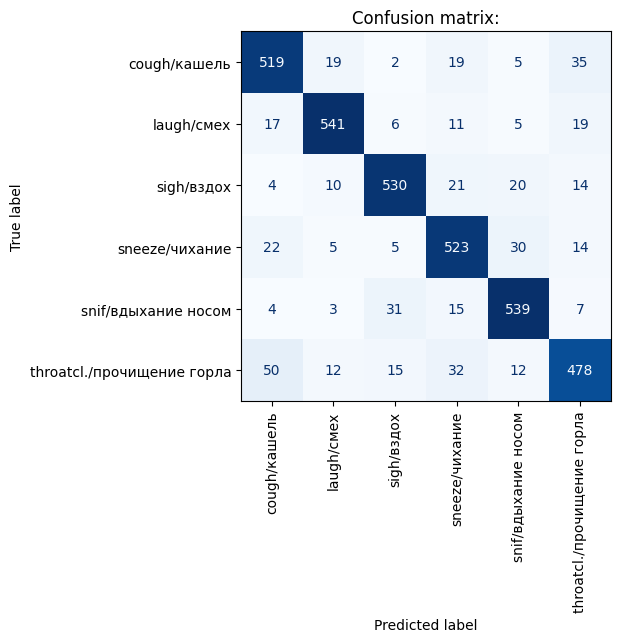

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.591    |0.858    |0.451    |
|laugh/смех          |0.679    |0.613    |0.761    |
|sigh/вздох          |0.772    |0.708    |0.850    |
|sneeze/чихание      |0.554    |0.439    |0.749    |
|sniff/вдыхание носом|0.789    |0.820    |0.761    |
|throatcl./проч.горла|0.506    |0.454    |0.570    |
----------------------------------------------------
Weighted average Precision : 0.690                 |
----------------------------------------------------
Weighted average Recall : 0.649                    |
----------------------------------------------------
Weighted average F1 : 0.649                        |
----------------------------------------------------
Accuracy : 0.649                                   |
----------------------------------------------------

Confusion matrix:
[[514  15   2  17   8 

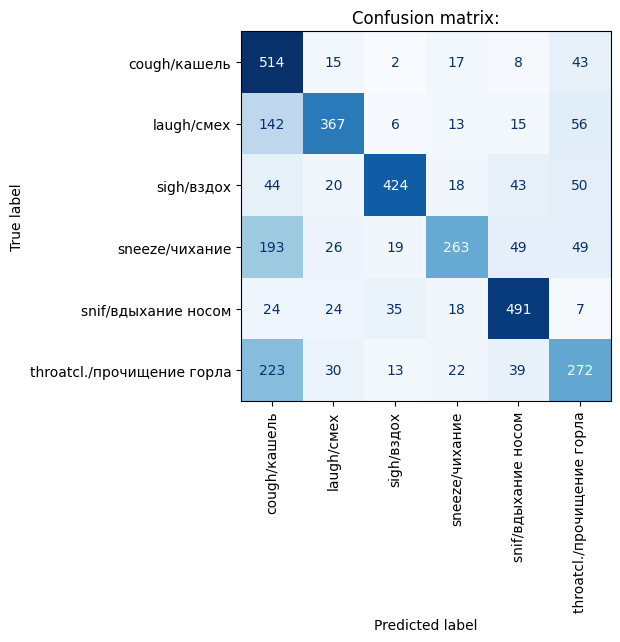

Logistic Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.806    |0.813    |0.798    |
|laugh/смех          |0.859    |0.860    |0.858    |
|sigh/вздох          |0.855    |0.850    |0.860    |
|sneeze/чихание      |0.819    |0.841    |0.797    |
|sniff/вдыхание носом|0.843    |0.845    |0.841    |
|throatcl./проч.горла|0.769    |0.743    |0.797    |
----------------------------------------------------
Weighted average Precision : 0.825                 |
----------------------------------------------------
Weighted average Recall : 0.825                    |
----------------------------------------------------
Weighted average F1 : 0.825                        |
----------------------------------------------------
Accuracy : 0.825                                   |
----------------------------------------------------

Confusion matrix:
[[487 

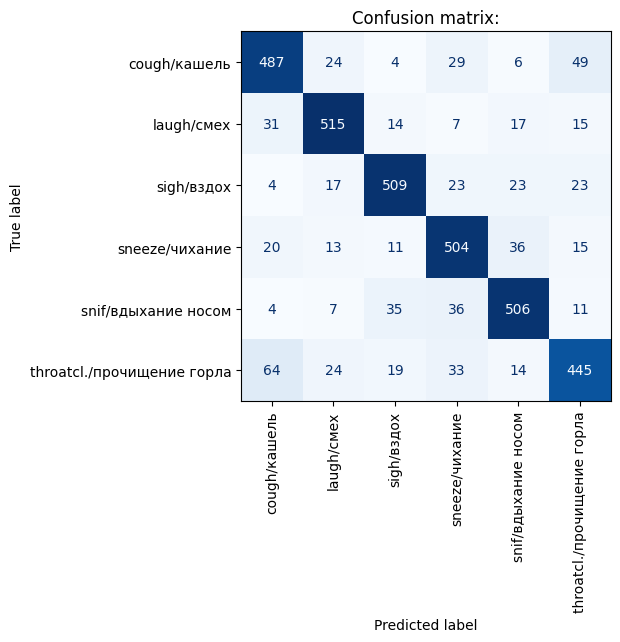

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.413    |0.422    |0.404    |
|laugh/смех          |0.455    |0.447    |0.464    |
|sigh/вздох          |0.528    |0.526    |0.529    |
|sneeze/чихание      |0.386    |0.381    |0.391    |
|sniff/вдыхание носом|0.563    |0.574    |0.553    |
|throatcl./проч.горла|0.305    |0.302    |0.307    |
----------------------------------------------------
Weighted average Precision : 0.441                 |
----------------------------------------------------
Weighted average Recall : 0.442                    |
----------------------------------------------------
Weighted average F1 : 0.442                        |
----------------------------------------------------
Accuracy : 0.442                                   |
----------------------------------------------------

Confusion matrix:
[[253  74  4

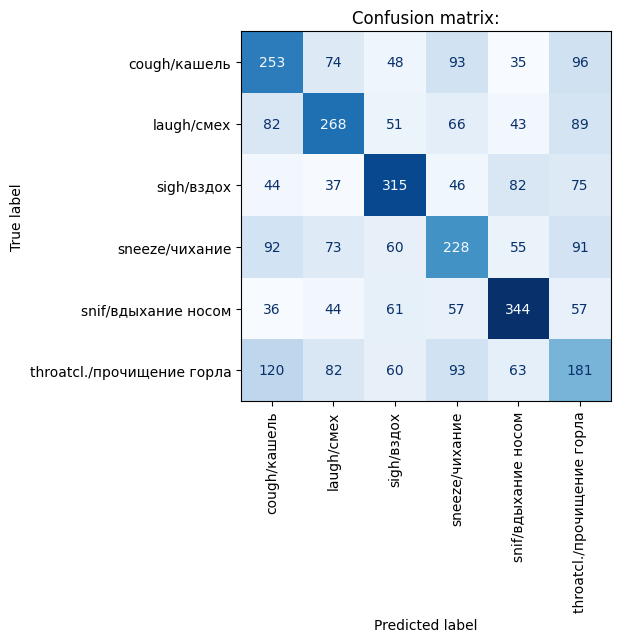

Neural Network:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.834    |0.836    |0.831    |
|laugh/смех          |0.895    |0.891    |0.899    |
|sigh/вздох          |0.883    |0.878    |0.887    |
|sneeze/чихание      |0.841    |0.860    |0.823    |
|sniff/вдыхание носом|0.867    |0.876    |0.858    |
|throatcl./проч.горла|0.805    |0.783    |0.829    |
----------------------------------------------------
Weighted average Precision : 0.854                 |
----------------------------------------------------
Weighted average Recall : 0.854                    |
----------------------------------------------------
Weighted average F1 : 0.854                        |
----------------------------------------------------
Accuracy : 0.854                                   |
----------------------------------------------------

Confusion matrix:
[[501  23  

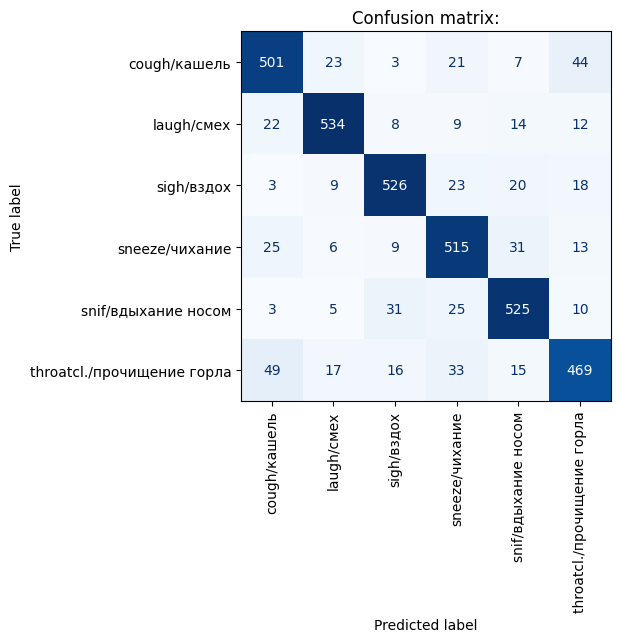

In [30]:
comparing_with_sota_VS(models, names, vocalsound_IS13_train_pca, vocalsound_targets_train_is13, vocalsound_IS13_test_pca, vocalsound_targets_test_is13)

SVM_Poly:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.657    |0.556    |0.802    |
|laugh/смех          |0.730    |0.633    |0.861    |
|sigh/вздох          |0.821    |0.771    |0.878    |
|sneeze/чихание      |0.780    |0.773    |0.787    |
|sniff/вдыхание носом|0.832    |0.783    |0.887    |
|throatcl./проч.горла|0.573    |0.811    |0.443    |
----------------------------------------------------
Weighted average Precision : 0.777                 |
----------------------------------------------------
Weighted average Recall : 0.721                    |
----------------------------------------------------
Weighted average F1 : 0.732                        |
----------------------------------------------------
Accuracy : 0.721                                   |
----------------------------------------------------

Confusion matrix:
[[333  17   4  36

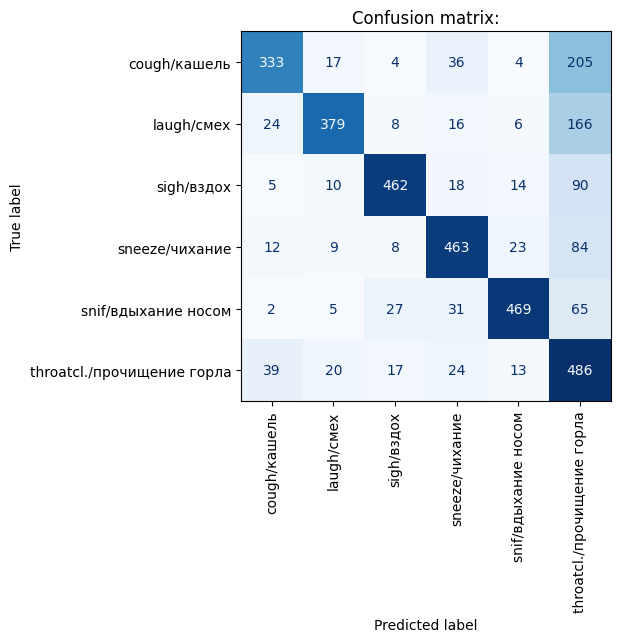

SVM_RBF:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.840    |0.846    |0.834    |
|laugh/смех          |0.890    |0.888    |0.891    |
|sigh/вздох          |0.888    |0.886    |0.889    |
|sneeze/чихание      |0.846    |0.873    |0.820    |
|sniff/вдыхание носом|0.883    |0.890    |0.877    |
|throatcl./проч.горла|0.800    |0.765    |0.839    |
----------------------------------------------------
Weighted average Precision : 0.858                 |
----------------------------------------------------
Weighted average Recall : 0.858                    |
----------------------------------------------------
Weighted average F1 : 0.858                        |
----------------------------------------------------
Accuracy : 0.858                                   |
----------------------------------------------------

Confusion matrix:
[[507  21   5  26 

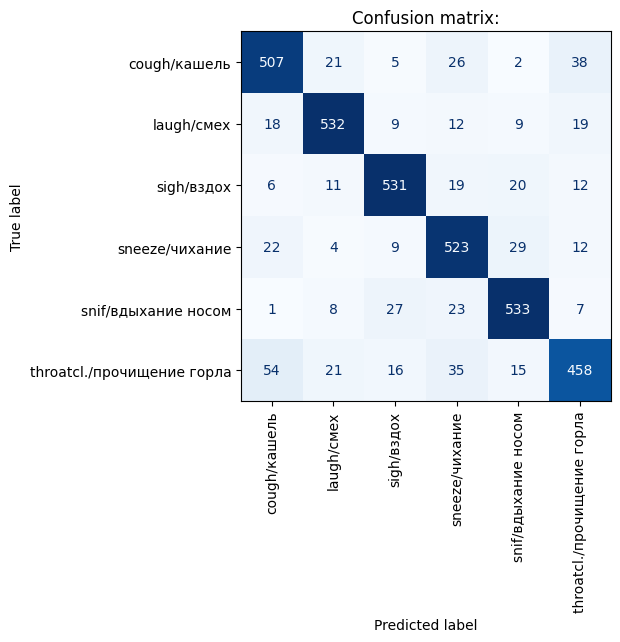

SVM_Sigmoid:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.611    |0.736    |0.523    |
|laugh/смех          |0.747    |0.723    |0.772    |
|sigh/вздох          |0.752    |0.793    |0.714    |
|sneeze/чихание      |0.709    |0.669    |0.754    |
|sniff/вдыхание носом|0.780    |0.761    |0.800    |
|throatcl./проч.горла|0.611    |0.521    |0.739    |
----------------------------------------------------
Weighted average Precision : 0.717                 |
----------------------------------------------------
Weighted average Recall : 0.701                    |
----------------------------------------------------
Weighted average F1 : 0.702                        |
----------------------------------------------------
Accuracy : 0.701                                   |
----------------------------------------------------

Confusion matrix:
[[441  36  34 

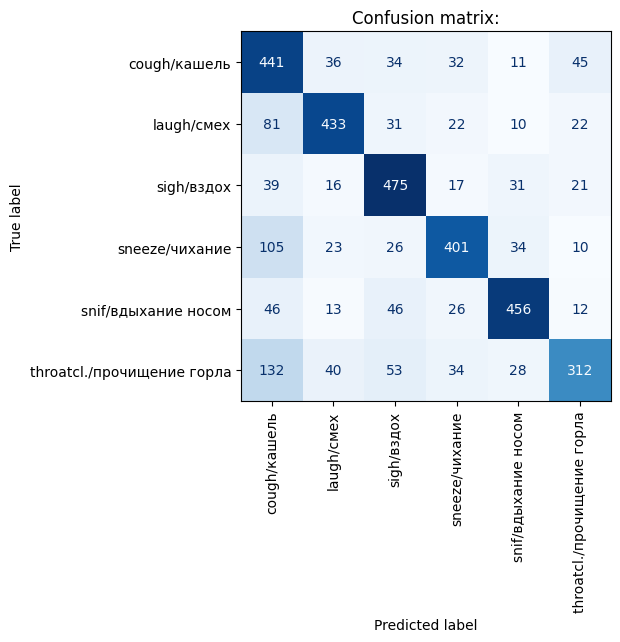

LDA:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.856    |0.868    |0.844    |
|laugh/смех          |0.912    |0.907    |0.917    |
|sigh/вздох          |0.895    |0.885    |0.906    |
|sneeze/чихание      |0.866    |0.881    |0.850    |
|sniff/вдыхание носом|0.895    |0.900    |0.889    |
|throatcl./проч.горла|0.820    |0.803    |0.838    |
----------------------------------------------------
Weighted average Precision : 0.874                 |
----------------------------------------------------
Weighted average Recall : 0.874                    |
----------------------------------------------------
Weighted average F1 : 0.874                        |
----------------------------------------------------
Accuracy : 0.874                                   |
----------------------------------------------------

Confusion matrix:
[[520  18   2  20   4 

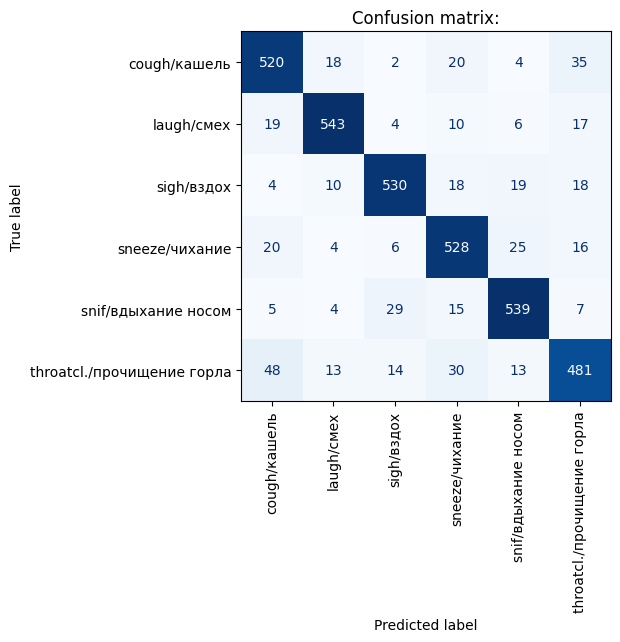

KNN:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.594    |0.858    |0.454    |
|laugh/смех          |0.674    |0.603    |0.763    |
|sigh/вздох          |0.773    |0.720    |0.835    |
|sneeze/чихание      |0.542    |0.427    |0.742    |
|sniff/вдыхание носом|0.792    |0.823    |0.763    |
|throatcl./проч.горла|0.513    |0.462    |0.576    |
----------------------------------------------------
Weighted average Precision : 0.689                 |
----------------------------------------------------
Weighted average Recall : 0.649                    |
----------------------------------------------------
Weighted average F1 : 0.648                        |
----------------------------------------------------
Accuracy : 0.649                                   |
----------------------------------------------------

Confusion matrix:
[[514  14   3  16   9 

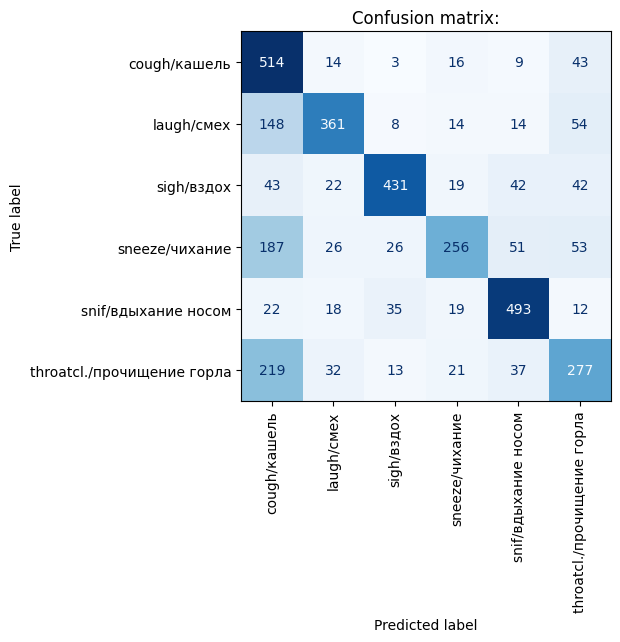

Logistic Regression:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.817    |0.821    |0.812    |
|laugh/смех          |0.868    |0.871    |0.864    |
|sigh/вздох          |0.854    |0.848    |0.860    |
|sneeze/чихание      |0.816    |0.835    |0.797    |
|sniff/вдыхание носом|0.849    |0.855    |0.843    |
|throatcl./проч.горла|0.788    |0.761    |0.816    |
----------------------------------------------------
Weighted average Precision : 0.832                 |
----------------------------------------------------
Weighted average Recall : 0.832                    |
----------------------------------------------------
Weighted average F1 : 0.832                        |
----------------------------------------------------
Accuracy : 0.832                                   |
----------------------------------------------------

Confusion matrix:
[[492 

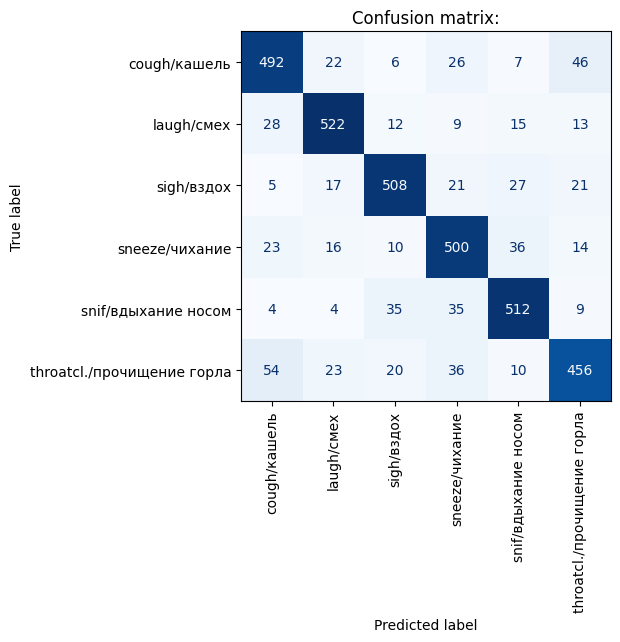

Decision Tree:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.400    |0.401    |0.399    |
|laugh/смех          |0.484    |0.494    |0.474    |
|sigh/вздох          |0.560    |0.553    |0.567    |
|sneeze/чихание      |0.403    |0.407    |0.399    |
|sniff/вдыхание носом|0.556    |0.541    |0.571    |
|throatcl./проч.горла|0.308    |0.311    |0.306    |
----------------------------------------------------
Weighted average Precision : 0.453                 |
----------------------------------------------------
Weighted average Recall : 0.451                    |
----------------------------------------------------
Weighted average F1 : 0.452                        |
----------------------------------------------------
Accuracy : 0.451                                   |
----------------------------------------------------

Confusion matrix:
[[240  73  3

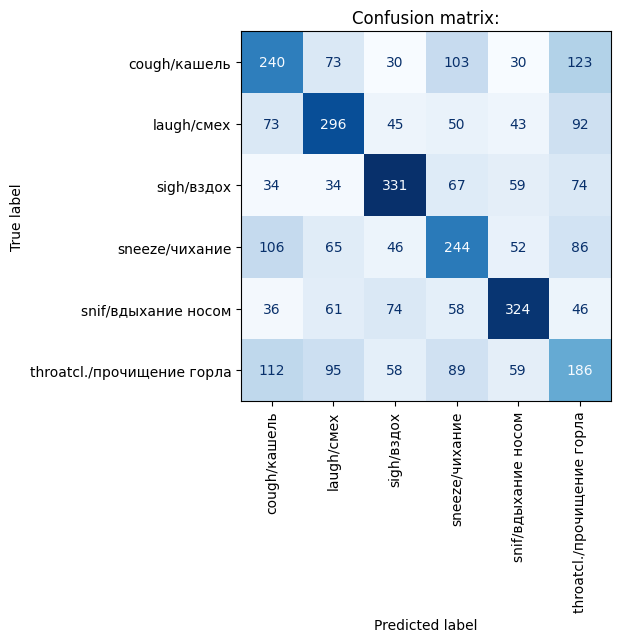

Neural Network:
----------------------------------------------------
|Class               |F1-score |Recall   |Precision|
----------------------------------------------------
|cough/кашель        |0.841    |0.845    |0.838    |
|laugh/смех          |0.899    |0.900    |0.898    |
|sigh/вздох          |0.881    |0.881    |0.880    |
|sneeze/чихание      |0.848    |0.865    |0.833    |
|sniff/вдыхание носом|0.867    |0.871    |0.863    |
|throatcl./проч.горла|0.816    |0.791    |0.842    |
----------------------------------------------------
Weighted average Precision : 0.859                 |
----------------------------------------------------
Weighted average Recall : 0.859                    |
----------------------------------------------------
Weighted average F1 : 0.859                        |
----------------------------------------------------
Accuracy : 0.859                                   |
----------------------------------------------------

Confusion matrix:
[[506  21  

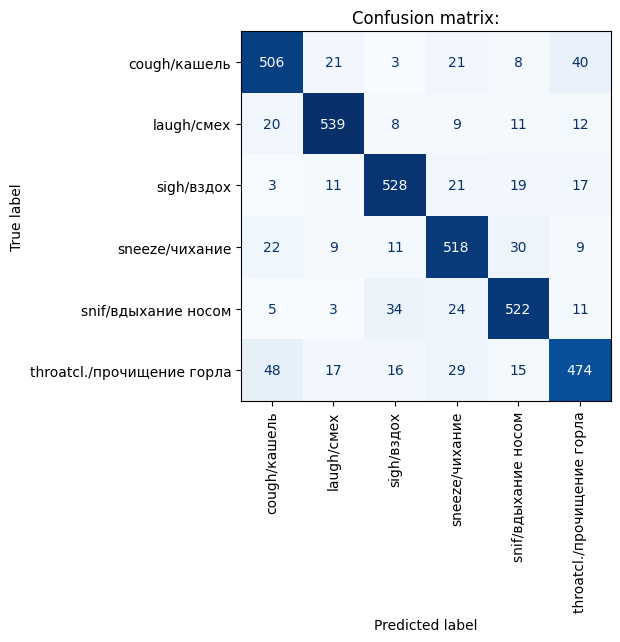

In [31]:
comparing_with_sota_VS(models, names, vocalsound_IS13_train_val_pca, vocalsound_targets_train_val_is13, vocalsound_IS13_test_pca, vocalsound_targets_test_is13)